<a href="https://colab.research.google.com/github/TusharRGore/Unsupervised_ML_Netflix_Clustering/blob/main/Unsupervised_ML_Netflix_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
data

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [5]:
data.sample(5)

show_id     type                           title         director  \
2884   s2885    Movie                     Hypersomnia   Gabriel Grieco   
2545   s2546    Movie                 Growing Up Wild    Keith Scholey   
1100   s1101  TV Show                      Bridgerton              NaN   
2653   s2654    Movie  Haunters: The Art of the Scare    Jon Schnitzer   
6012   s6013    Movie                Teenage Cocktail  John Carchietta   

                                                   cast        country  \
2884  Yamila Saud, Gerardo Romano, Jimena Barón, Van...      Argentina   
2545                                       Daveed Diggs  United States   
1100  Adjoa Andoh, Julie Andrews, Lorraine Ashbourne...  United States   
2653                                                NaN  United States   
6012  Nichole Bloom, Fabianne Therese, Michelle Bort...  United States   

             date_added  release_year rating  duration  \
2884       June 8, 2017          2016  TV-MA    84 min   
2545  February 19, 2017          2016      G    78 min   
1100  December 25, 2020          2020  TV-MA  1 Season   
2653    January 2, 2018          2017  TV-MA    89 min   
6012   January 15, 2017          2016  TV-MA    89 min   

                                           listed_in  \
2884  Horror Movies, International Movies, Thrillers   
2545         Children & Family Movies, Documentaries   
1100                    Romantic TV Shows, TV Dramas   
2653                    Documentaries, Horror Movies   
6012        Dramas, Independent Movies, LGBTQ Movies   

                                            description  
2884  A young actress rehearsing for a play about hu...  
2545  Five baby animals from different parts of the ...  
1100  The eight close-knit siblings of the Bridgerto...  
2653  This documentary takes us into the world of th...  
6012  Two teen girls form an intense bond and launch...

In [6]:
data.shape

(7787, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
plt_na=data.isna()
plt_na.head(5)

show_id   type  title  director   cast  country  date_added  release_year  \
0    False  False  False      True  False    False       False         False   
1    False  False  False     False  False    False       False         False   
2    False  False  False     False  False    False       False         False   
3    False  False  False     False  False    False       False         False   
4    False  False  False     False  False    False       False         False   

   rating  duration  listed_in  description  
0   False     False      False        False  
1   False     False      False        False  
2   False     False      False        False  
3   False     False      False        False  
4   False     False      False        False

<Axes: >

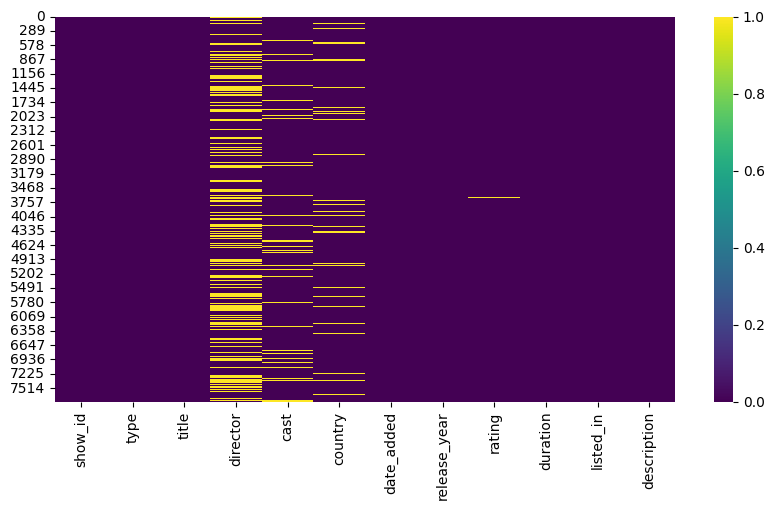

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(plt_na,cmap='viridis')

In [12]:
#drop Director column since it have way too many nan values
data.drop('director',axis=1,inplace=True)

In [13]:
data.drop('cast',axis=1,inplace=True)

In [14]:
#check for date_added_nan
data_added_nan=data[data['date_added'].isna()]
data_added_nan

show_id     type                                        title  \
258     s259  TV Show  A Young Doctor's Notebook and Other Stories   
549     s550  TV Show              Anthony Bourdain: Parts Unknown   
2263   s2264  TV Show                                      Frasier   
2288   s2289  TV Show                                      Friends   
2555   s2556  TV Show                              Gunslinger Girl   
3374   s3375  TV Show                                     Kikoriki   
3492   s3493  TV Show                          La Familia P. Luche   
3946   s3947  TV Show                                        Maron   
5137   s5138  TV Show                                 Red vs. Blue   
6065   s6066  TV Show                 The Adventures of Figaro Pho   

             country date_added  release_year rating    duration  \
258   United Kingdom        NaN          2013  TV-MA   2 Seasons   
549    United States        NaN          2018  TV-PG   5 Seasons   
2263   United States        NaN          2003  TV-PG  11 Seasons   
2288   United States        NaN          2003  TV-14  10 Seasons   
2555           Japan        NaN          2008  TV-14   2 Seasons   
3374             NaN        NaN          2010   TV-Y   2 Seasons   
3492   United States        NaN          2012  TV-14   3 Seasons   
3946   United States        NaN          2016  TV-MA   4 Seasons   
5137   United States        NaN          2015     NR  13 Seasons   
6065       Australia        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
258            British TV Shows, TV Comedies, TV Dramas   
549                                          Docuseries   
2263                     Classic & Cult TV, TV Comedies   
2288                     Classic & Cult TV, TV Comedies   
2555                       Anime Series, Crime TV Shows   
3374                                           Kids' TV   
3492  International TV Shows, Spanish-Language TV Sh...   
3946                                        TV Comedies   
5137  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6065                              Kids' TV, TV Comedies   

                                            description  
258   Set during the Russian Revolution, this comic ...  
549   This CNN original series has chef Anthony Bour...  
2263  Frasier Crane is a snooty but lovable Seattle ...  
2288  This hit sitcom follows the merry misadventure...  
2555  On the surface, the Social Welfare Agency appe...  
3374  A wacky rabbit and his gang of animal pals hav...  
3492  This irreverent sitcom featues Ludovico, Feder...  
3946  Marc Maron stars as Marc Maron, who interviews...  
5137  This parody of first-person shooter games, mil...  
6065  Imagine your worst fears, then multiply them: ...

In [15]:
data_added_nan.shape

(10, 10)

In [16]:
data.dropna(subset=['date_added'],inplace=True)

In [17]:
data.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [18]:
data['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [19]:
movies_by_year=data[data.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
shows_by_year=data[data.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content_by_year=data['release_year'].value_counts().sort_index(ascending=False).head(15)


In [20]:
movies_by_year

release_year
2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    157
2014     90
2013     64
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
Name: count, dtype: int64

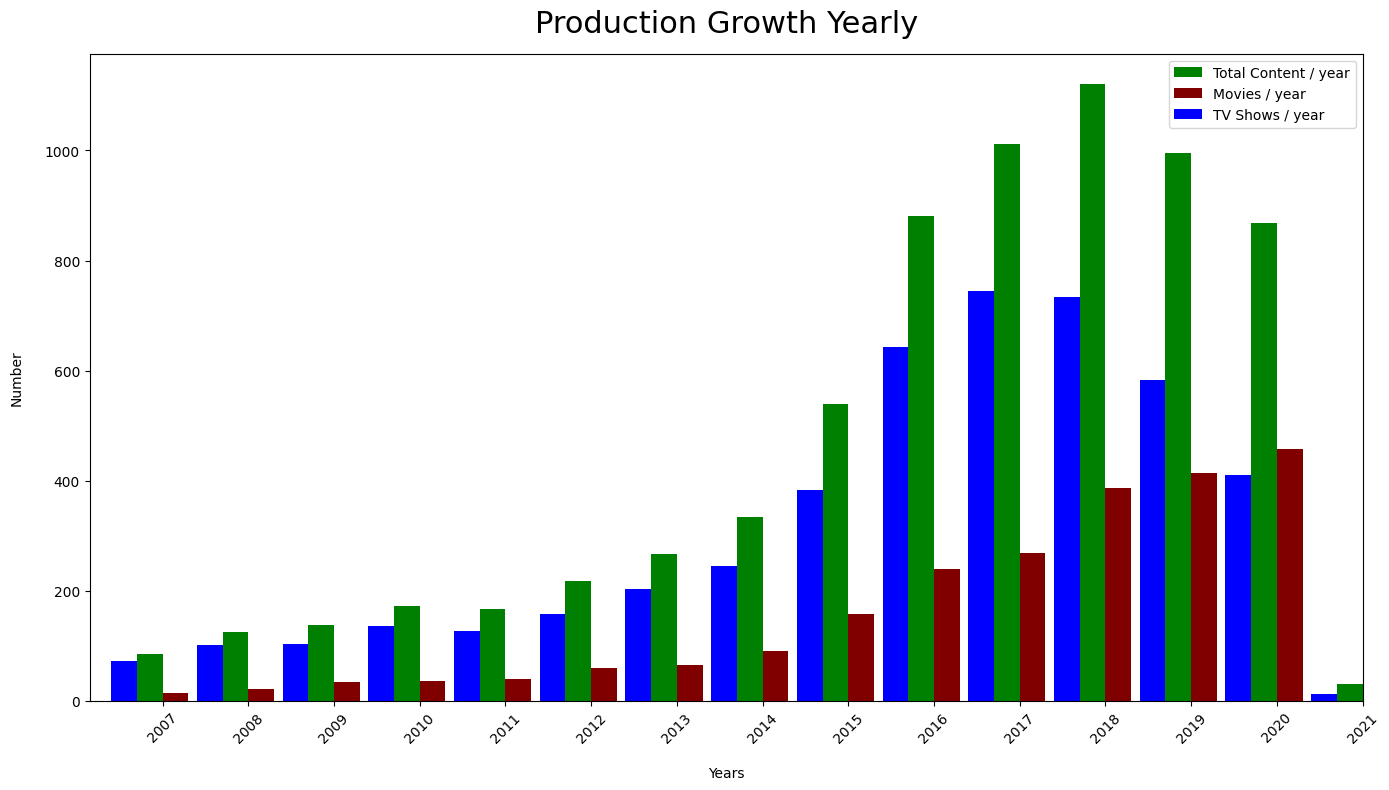

In [21]:
total_content_sorted = total_content_by_year.sort_index(ascending=True)
yearly_movies_sorted = movies_by_year.sort_index(ascending=True)
yearly_shows_sorted =shows_by_year.sort_index(ascending=True)

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bar plot for total content, movies, and TV shows
total_content_sorted.plot(kind='bar', width=0.3, position=1, color='green', label="Total Content / year", ax=ax)
yearly_movies_sorted.plot(kind='bar', width=0.3, position=0, color='maroon', label="Movies / year", ax=ax)
yearly_shows_sorted.plot(kind='bar', width=0.3, position=2, color='blue', label="TV Shows / year", ax=ax)

# Customizing the plot
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [22]:
#Check release year
data['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

<Axes: ylabel='release_year'>

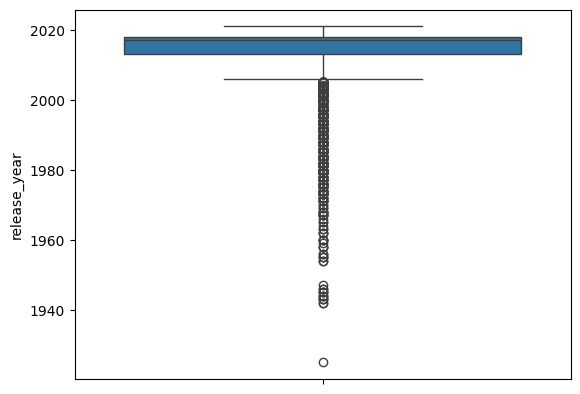

In [23]:
sns.boxplot(data['release_year'])

In [24]:
q1=data['release_year'].quantile(0.25)
q3=data['release_year'].quantile(0.75)
iqr=q3-q1
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')

Q1: 2013.0
Q3: 2018.0
IQR: 5.0


In [25]:
release_year_outlier=data[(data['release_year']<q1-1.5*iqr)|(data['release_year']>q3+1.5*iqr)]
release_year_outlier

show_id     type                 title  \
7         s8    Movie                   187   
44       s45    Movie              Æon Flux   
94       s95    Movie               28 Days   
97       s98    Movie           3 Deewarein   
105     s106    Movie   300 Miles to Heaven   
...      ...      ...                   ...   
7745   s7746    Movie  Yours, Mine and Ours   
7749   s7750  TV Show             Yu-Gi-Oh!   
7754   s7755    Movie                  Yuva   
7760   s7761    Movie             Zaki Chan   
7782   s7783    Movie                  Zozo   

                                                country          date_added  \
7                                         United States    November 1, 2019   
44                                        United States    February 1, 2018   
94                                        United States  September 30, 2020   
97                                                  NaN   December 31, 2019   
105                             Denmark, France, Poland     October 1, 2019   
...                                                 ...                 ...   
7745                                      United States   November 20, 2019   
7749                                              Japan        July 8, 2020   
7754                                              India       March 1, 2018   
7760                                              Egypt        May 19, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   

      release_year rating   duration  \
7             1997      R    119 min   
44            2005  PG-13     93 min   
94            2000  PG-13    104 min   
97            2003  TV-MA    121 min   
105           1989  TV-14     93 min   
...            ...    ...        ...   
7745          2005     PG     88 min   
7749          2005  TV-Y7  2 Seasons   
7754          2004  TV-14    160 min   
7760          2005  TV-PG    109 min   
7782          2005  TV-MA     99 min   

                                            listed_in  \
7                                              Dramas   
44               Action & Adventure, Sci-Fi & Fantasy   
94                                   Comedies, Dramas   
97            Dramas, International Movies, Thrillers   
105                      Dramas, International Movies   
...                                               ...   
7745               Children & Family Movies, Comedies   
7749                           Anime Series, Kids' TV   
7754                     Dramas, International Movies   
7760  Comedies, International Movies, Romantic Movies   
7782                     Dramas, International Movies   

                                            description  
7     After one of his high school students attacks ...  
44    Aiming to hasten an uprising, the leader of an...  
94    After her drunken antics result in property da...  
97    A reporter interviews three convicts on death ...  
105   Hoping to help their dissident parents, two br...  
...                                                 ...  
7745  When a father of eight and a mother of 10 prep...  
7749  The lives of young Yugi Moto and his friends J...  
7754  An accident on a bridge ties together three yo...  
7760  An unqualified young man has his work cut out ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  

[743 rows x 10 columns]

In [26]:
#2009 is 15 percent
data["release_year"] = np.where(data["release_year"] <2009, data.release_year.mean(),data['release_year'])

In [27]:
data.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

<Axes: ylabel='release_year'>

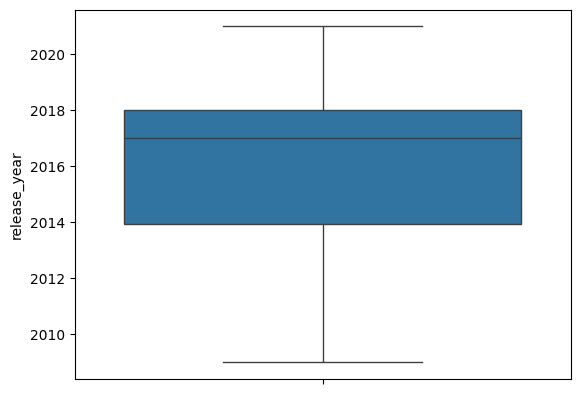

In [28]:
sns.boxplot(data['release_year'])

Title

In [29]:
data.title.nunique()

7777

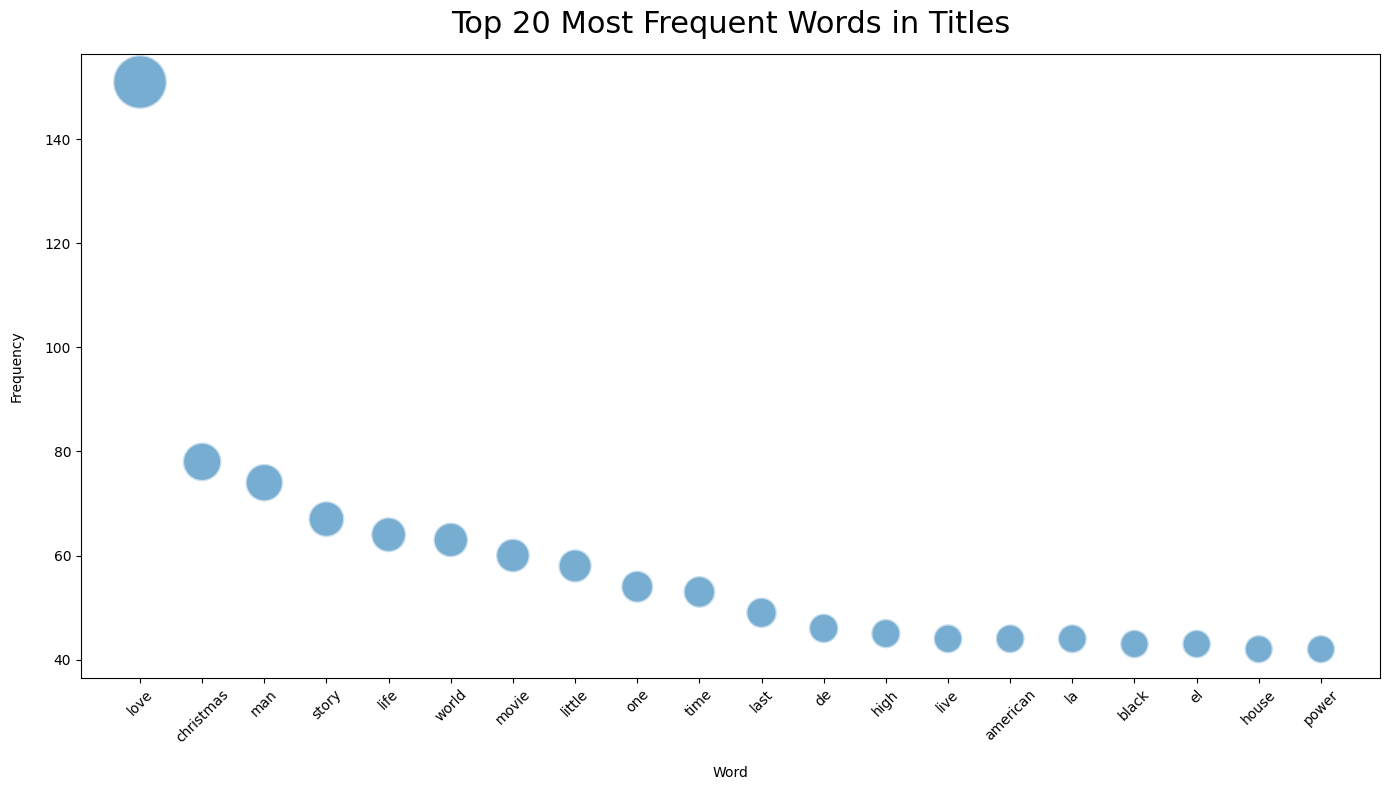

In [30]:
from collections import Counter
from wordcloud import STOPWORDS
import string

# Assuming 'df' is your DataFrame and 'title' is the column with titles
data_wordcloud = data['title']
text = " ".join(word for word in data_wordcloud)

# Create a stopword list and preprocess the text
stopwords = set(STOPWORDS)
table = str.maketrans('', '', string.punctuation)
words = text.lower().translate(table).split()
filtered_words = [word for word in words if word not in stopwords and word.isalpha()]

# Count word frequencies
word_counts = Counter(filtered_words)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(14, 8))
plt.scatter(word_freq_df['Word'], word_freq_df['Frequency'], s=word_freq_df['Frequency']*10, alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('Word', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Top 20 Most Frequent Words in Titles', y=1.02, fontsize=22)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Christmas , Love ,Man , Story are popular words in the Title. Romantic genre is dominating in the title

Countries

In [31]:
data.country.nunique()

681

In [32]:
data.country.value_counts()

country
United States                                                   2549
India                                                            923
United Kingdom                                                   396
Japan                                                            225
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In [33]:
data.country.isna().sum()

506

In [34]:
data.country.mode()[0]

'United States'

In [35]:
data.country.fillna(data.country.mode()[0],inplace=True)

In [36]:
data.country.isna().sum()

0

In [37]:
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [38]:
data.type.value_counts()

type
Movie      5377
TV Show    2400
Name: count, dtype: int64

In [39]:
country_counts = data['country'].value_counts().head(20)
country_counts

country
United States                    3055
India                             923
United Kingdom                    396
Japan                             225
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          82
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: count, dtype: int64

In [40]:
# Split countries where multiple countries are listed
data = data.assign(country=data['country'].str.split(', ')).explode('country')

In [41]:

# Count the number of productions per country for movies
country_movie_counts = data[data['type'] == 'Movie']['country'].value_counts().reset_index()
country_movie_counts.columns = ['Country', 'Movie']


In [42]:
# Count the number of productions per country for movies
country_tvshow_counts = data[data['type'] == 'TV Show']['country'].value_counts().reset_index()
country_tvshow_counts.columns = ['Country', 'TV Show']

In [43]:
# Merge the counts into a single DataFrame
country_counts = pd.merge(country_movie_counts, country_tvshow_counts, on='Country', how='outer').fillna(0)

In [44]:
# Take the top 20 countries based on the total number of productions
country_counts['Total'] = country_counts['Movie'] + country_counts['TV Show']
country_counts = country_counts.sort_values(by='Total', ascending=False).head(5)

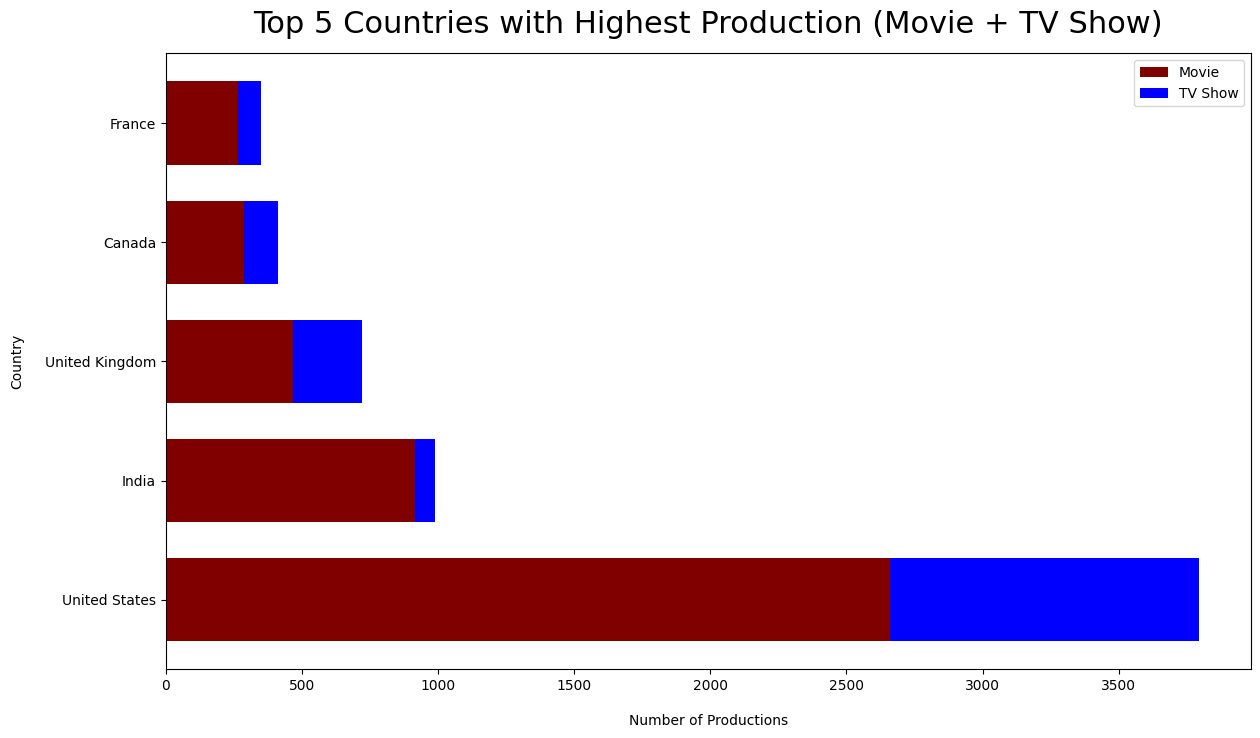

In [45]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Creating the stacked bar chart
bar_width = 0.7
p1 = plt.barh(country_counts['Country'], country_counts['Movie'], color='maroon', label='Movie', height=bar_width)
p2 = plt.barh(country_counts['Country'], country_counts['TV Show'], color='blue', left=country_counts['Movie'], label='TV Show', height=bar_width)

plt.xlabel('Number of Productions', labelpad=15)
plt.ylabel('Country', labelpad=15)
plt.title('Top 5 Countries with Highest Production (Movie + TV Show)', y=1.02, fontsize=22)
plt.legend()

plt.show()

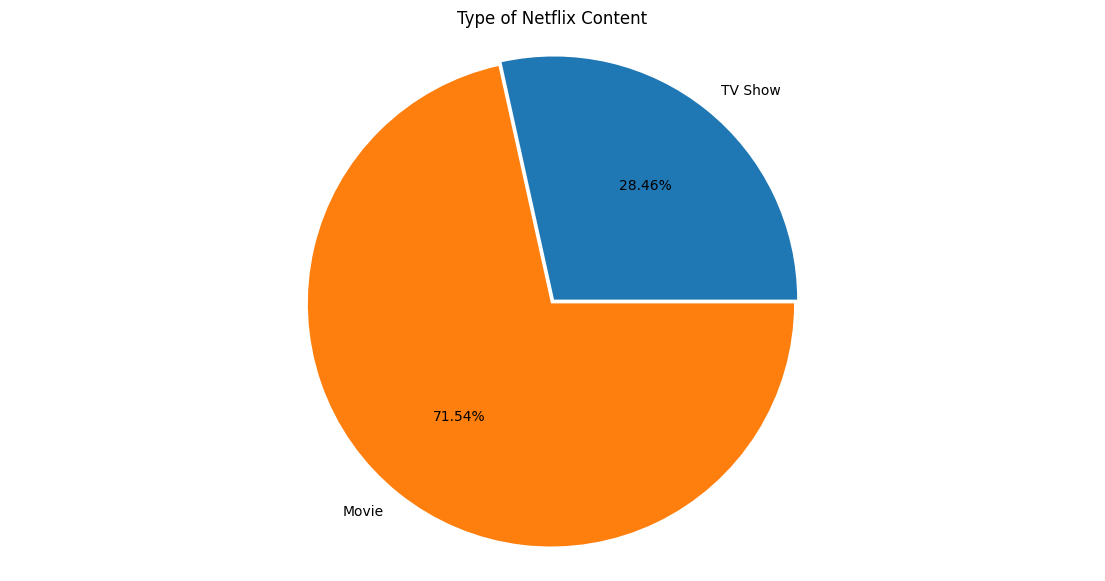

In [46]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=0)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Nearly 3/4 of content is Movies whereas 1/4 is TV Show

Check Ratings

In [47]:
data.rating.value_counts()

rating
TV-MA       3350
TV-14       2166
R           1021
TV-PG        926
PG-13        610
PG           369
TV-Y7        363
TV-Y         340
TV-G         217
NR           113
G             58
TV-Y7-FV       8
UR             7
NC-17          5
Name: count, dtype: int64

In [48]:
rating_counts = data['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']
rating_counts.sort_values(by='Count')


Rating  Count
13     NC-17      5
12        UR      7
11  TV-Y7-FV      8
10         G     58
9         NR    113
8       TV-G    217
7       TV-Y    340
6      TV-Y7    363
5         PG    369
4      PG-13    610
3      TV-PG    926
2          R   1021
1      TV-14   2166
0      TV-MA   3350

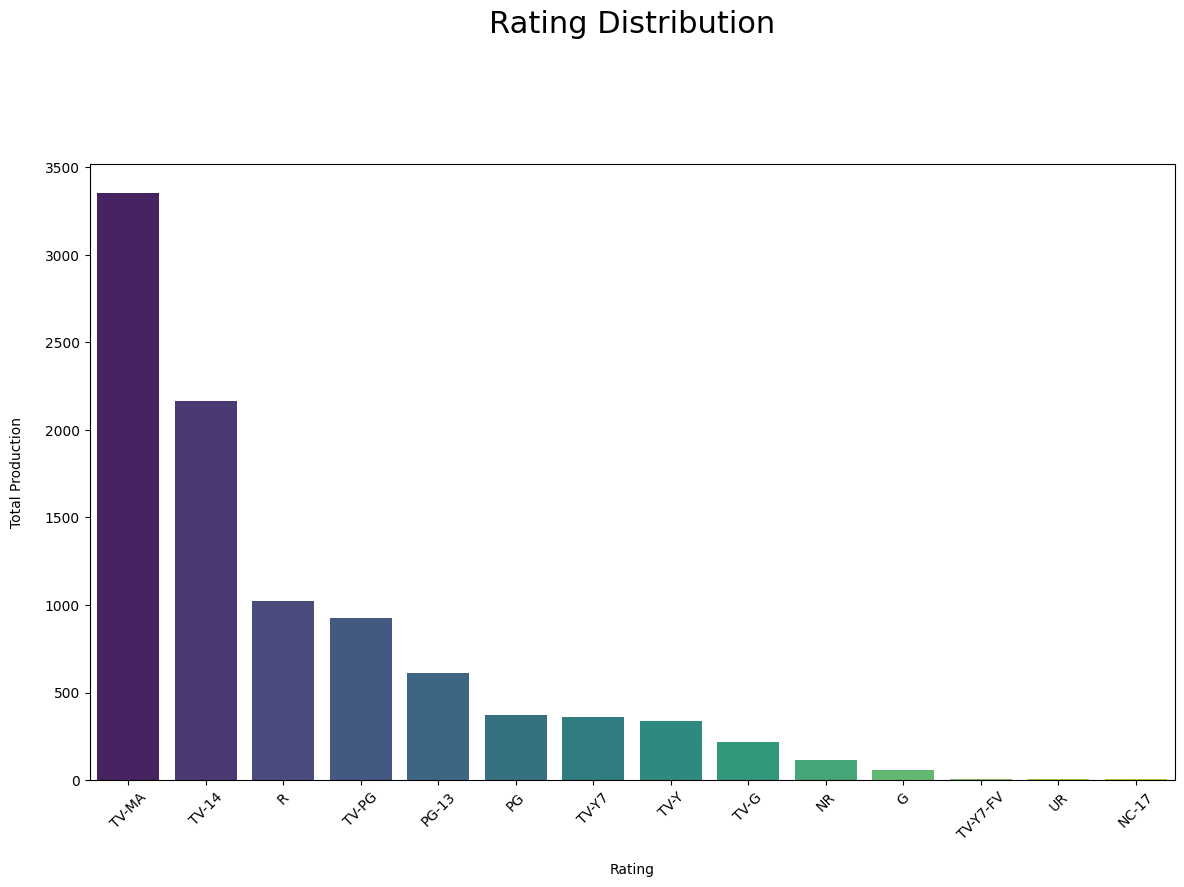

In [49]:
plt.figure(figsize=(14,8))
sns.barplot(x='Rating',y='Count',data=rating_counts,palette='viridis')
plt.xlabel('Rating',labelpad=15)
plt.ylabel('Total Production',labelpad=15)
plt.title('Rating Distribution',y=1.2,fontsize=22)
plt.xticks(rotation=45)
plt.show()

In [50]:
data.duration.value_counts()

duration
1 Season     1781
2 Seasons     440
3 Seasons     222
93 min        186
90 min        176
             ... 
214 min         1
182 min         1
224 min         1
233 min         1
191 min         1
Name: count, Length: 216, dtype: int64

Median Episode runtime is 55 mins

On avg 5 episodes are in a season on Netflix

In [51]:
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins



In [52]:
convert_seasons_to_min("4 Seasons")

1100

In [53]:
def all_the_duration_in_minutes():
  """
  This function will convert all the duration
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  data['duration'] = data.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in data.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert
      # season to total min
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  data.duration = time_list

In [54]:
data.duration.value_counts().to_frame().T

duration  1 Season  2 Seasons  3 Seasons  93 min  90 min  96 min  94 min  \
count         1781        440        222     186     176     168     161   

duration  92 min  91 min  95 min  ...  43 min  16 Seasons  189 min  193 min  \
count        155     150     147  ...       1           1        1        1   

duration  13 min  214 min  182 min  224 min  233 min  191 min  
count          1        1        1        1        1        1  

[1 rows x 216 columns]

In [55]:

data['type'].value_counts()

type
Movie      6839
TV Show    2721
Name: count, dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9560 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       9560 non-null   object 
 1   type          9560 non-null   object 
 2   title         9560 non-null   object 
 3   country       9560 non-null   object 
 4   date_added    9560 non-null   object 
 5   release_year  9560 non-null   float64
 6   rating        9553 non-null   object 
 7   duration      9560 non-null   object 
 8   listed_in     9560 non-null   object 
 9   description   9560 non-null   object 
dtypes: float64(1), object(9)
memory usage: 821.6+ KB


In [57]:
# Extract the numeric part of the duration
data['numeric_duration'] = data['duration'].str.extract('(\d+)').astype(float)

# Filter only TV Shows
tv_show_duration = data['numeric_duration'][data['type'] == 'TV Show']

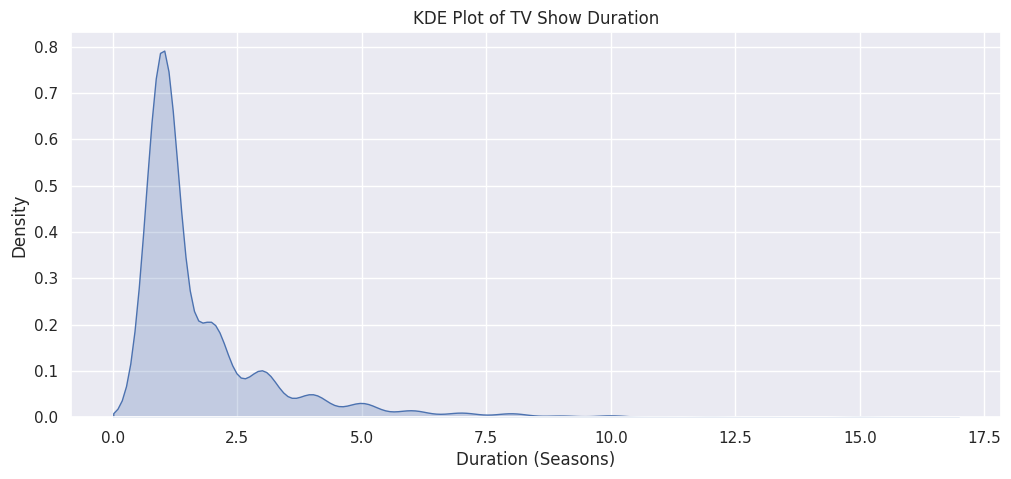

In [58]:

sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))
sns.kdeplot(data=tv_show_duration, shade=True)
plt.xlabel('Duration (Seasons)')
plt.title('KDE Plot of TV Show Duration')
plt.show()

In [59]:
data['numeric_duration'] = data['duration'].str.extract('(\d+)').astype(float)

# Filter only Movies
movie_duration = data['numeric_duration'][data['type'] == 'Movie']

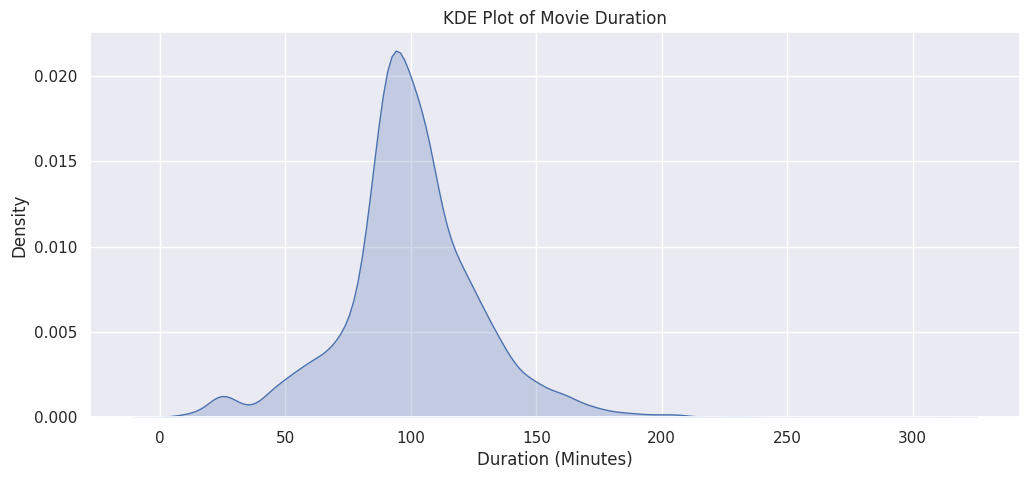

In [60]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 5))
sns.kdeplot(data=movie_duration, shade=True)
plt.xlabel('Duration (Minutes)')
plt.title('KDE Plot of Movie Duration')
plt.show()

Creating Categories

In [61]:
categories = ", ".join(data['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [62]:
len(categories)

20921

In [63]:
len(set(categories))

42

In [64]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [65]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 29),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('TV Thrillers', 58)]

In [66]:
#Top 5 least occured category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 29),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('TV Thrillers', 58),
 ('Teen TV Shows', 60)]

In [67]:
#Top 5 most occured category
sorted_category_wise_count[-5:]

[('Documentaries', 1022),
 ('International TV Shows', 1302),
 ('Comedies', 1746),
 ('Dramas', 2757),
 ('International Movies', 3122)]

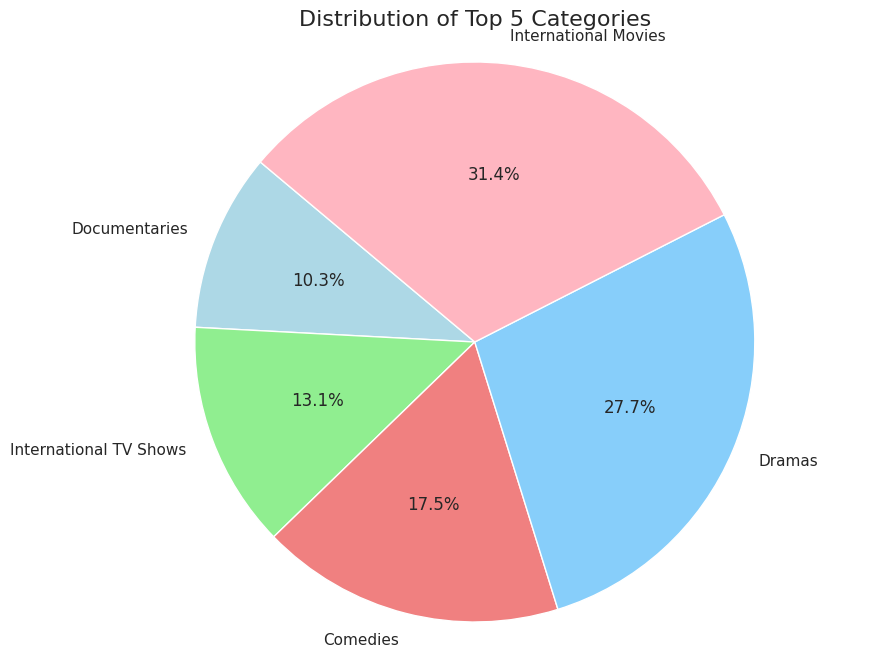

In [68]:
top_5_categories = sorted_category_wise_count[-5:]
categories = [item[0] for item in top_5_categories]
counts = [item[1] for item in top_5_categories]

# Colors for the pie chart slices
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Categories', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [69]:
# new column total_category

type(data.listed_in.iloc[0])

str

In [70]:
(data.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [71]:
(data.listed_in.iloc[0]).split(",")


['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [72]:

no_of_category = []
for categories in data.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [73]:

data['no_of_category'] = no_of_category

In [74]:

data[['listed_in' , 'no_of_category']].head()

listed_in  no_of_category
0  International TV Shows, TV Dramas, TV Sci-Fi &...               3
1                       Dramas, International Movies               2
2                Horror Movies, International Movies               2
3  Action & Adventure, Independent Movies, Sci-Fi...               3
4                                             Dramas               1

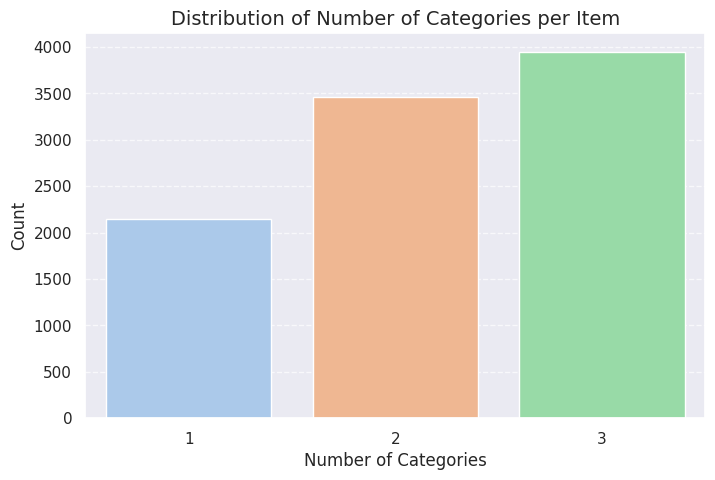

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(x=no_of_category, palette='pastel')
plt.xlabel('Number of Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Number of Categories per Item', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines on y-axis

plt.show()

In [76]:
data.shape

(9560, 12)

Creating month column for more insights

In [77]:
data.date_added.value_counts()

date_added
January 1, 2020       177
November 1, 2019      115
December 31, 2019      85
March 1, 2018          82
October 1, 2018        80
                     ... 
February 24, 2016       1
October 14, 2019        1
March 31, 2016          1
September 15, 2015      1
January 11, 2020        1
Name: count, Length: 1565, dtype: int64

In [78]:

data['date_added_month'] = data['date_added'].apply(lambda x: x.split(" ")[0])
data[['date_added' , 'date_added_month']].head()

date_added date_added_month
0    August 14, 2020           August
1  December 23, 2016         December
2  December 20, 2018         December
3  November 16, 2017         November
4    January 1, 2020          January

In [79]:

month_df=data['date_added_month'].value_counts().reset_index()
month_df

date_added_month  count
0           January   1000
1          December    990
2           October    975
3          November    892
4             March    761
5         September    756
6            August    738
7              July    733
8             April    730
9              June    658
10              May    639
11         February    587
12                     101

In [80]:
month_df.rename(columns={'date_added_month': 'Month_Name'}, inplace=True)

In [81]:
month_df.rename(columns={'count': 'Total'}, inplace=True)

In [82]:
ab = month_df.loc[0:11]
ab

Month_Name  Total
0     January   1000
1    December    990
2     October    975
3    November    892
4       March    761
5   September    756
6      August    738
7        July    733
8       April    730
9        June    658
10        May    639
11   February    587

In [83]:
month_names = ab.Month_Name.values

In [84]:
month_wise_count = ab.Total.values

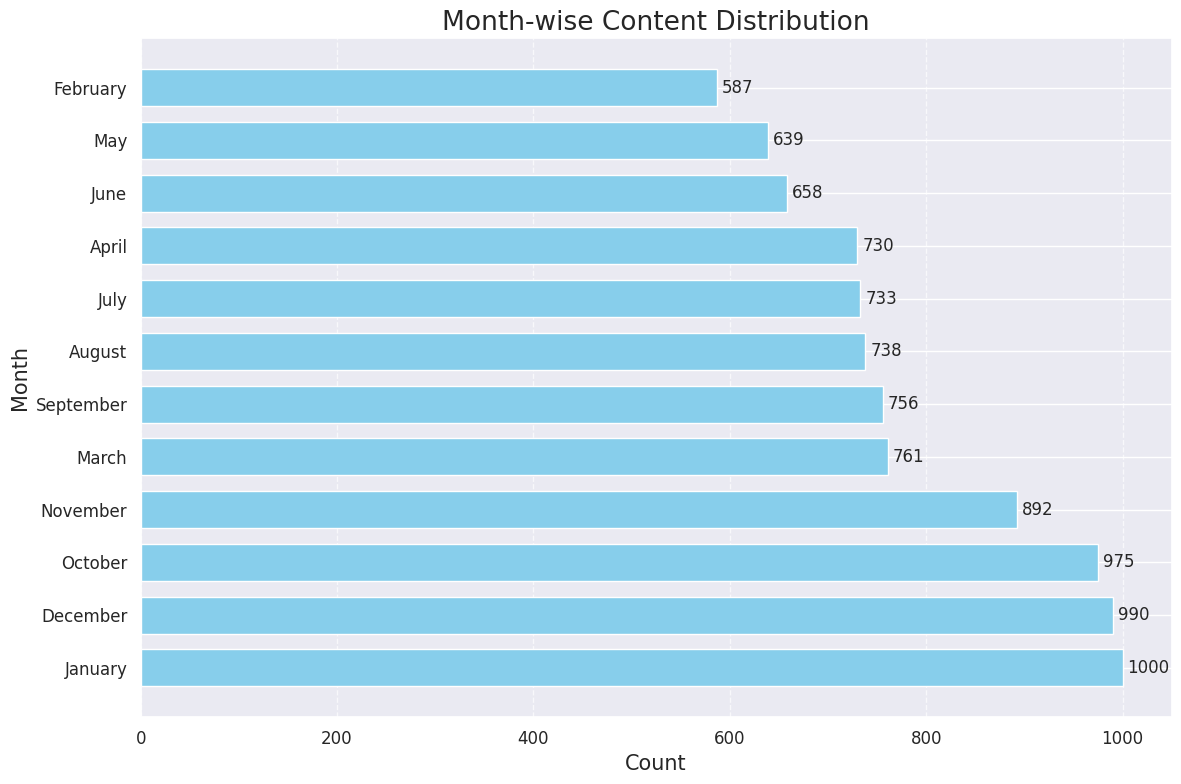

In [85]:

plt.figure(figsize=(12, 8))
bars = plt.barh(month_names, month_wise_count, height=0.7, color='skyblue')

# Customizing plot attributes
plt.title("Month-wise Content Distribution", fontsize=19)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Month", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding value labels to the bars
for bar, count in zip(bars, month_wise_count):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

Show ID

In [86]:
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'numeric_duration',
       'no_of_category', 'date_added_month'],
      dtype='object')

In [87]:

data.shape[0]

9560

NLP Preparation

In [88]:
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'numeric_duration',
       'no_of_category', 'date_added_month'],
      dtype='object')

In [89]:
data.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [90]:

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [91]:

import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ 

True

In [92]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [93]:
data['description'] = data['description'].apply(remove_punctuation)
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description  numeric_duration  \
0  In a future where the elite inhabit an island ...               4.0   
1  After a devastating earthquake hits Mexico Cit...              93.0   
2  When an army recruit is found dead his fellow ...              78.0   
3  In a postapocalyptic world ragdoll robots hide...              80.0   
4  A brilliant group of students become cardcount...             123.0   

   no_of_category date_added_month  
0               3           August  
1               2         December  
2               2         December  
3               3         November  
4               1          January

In [94]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [95]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')


i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [96]:

print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [97]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [98]:

data['description'] = data['description'].apply( remove_stopwords )
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description  numeric_duration  \
0  future elite inhabit island paradise far crowd...               4.0   
1  devastating earthquake hits mexico city trappe...              93.0   
2  army recruit found dead fellow soldiers forced...              78.0   
3  postapocalyptic world ragdoll robots hide fear...              80.0   
4  brilliant group students become cardcounting e...             123.0   

   no_of_category date_added_month  
0               3           August  
1               2         December  
2               2         December  
3               3         November  
4               1          January

In [99]:

# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [100]:
dictionary

dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('dangerous', 4419), ('machines', 10525), ('exterminate',

In [101]:

vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [102]:
vocab_before_stemming = pd.DataFrame({"Word": vocab, "count": count_of_vocab})

In [103]:
#Creating new Dataframe vocab_before_stemming
vocab_before_stemming = vocab_before_stemming.sort_values("count", ascending=False)

In [104]:
top10_most_ocurred_words = vocab_before_stemming.head(10)
top10_most_ocurred_words

Word  count
18855      şeref  19593
10390      ōarai  19592
12377     łukasz  19591
11101  überelite  19590
11673       über  19589
13288       ömer  19588
6584       émile  19587
18193      ángel  19586
10428     álvaro  19585
9867        álex  19584

In [105]:
# Extract the 'Word' and 'count' columns as lists
top10_most_occurred_words = top10_most_ocurred_words['Word'].tolist()
top10_most_occurred_words_count = top10_most_ocurred_words['count'].values.tolist()

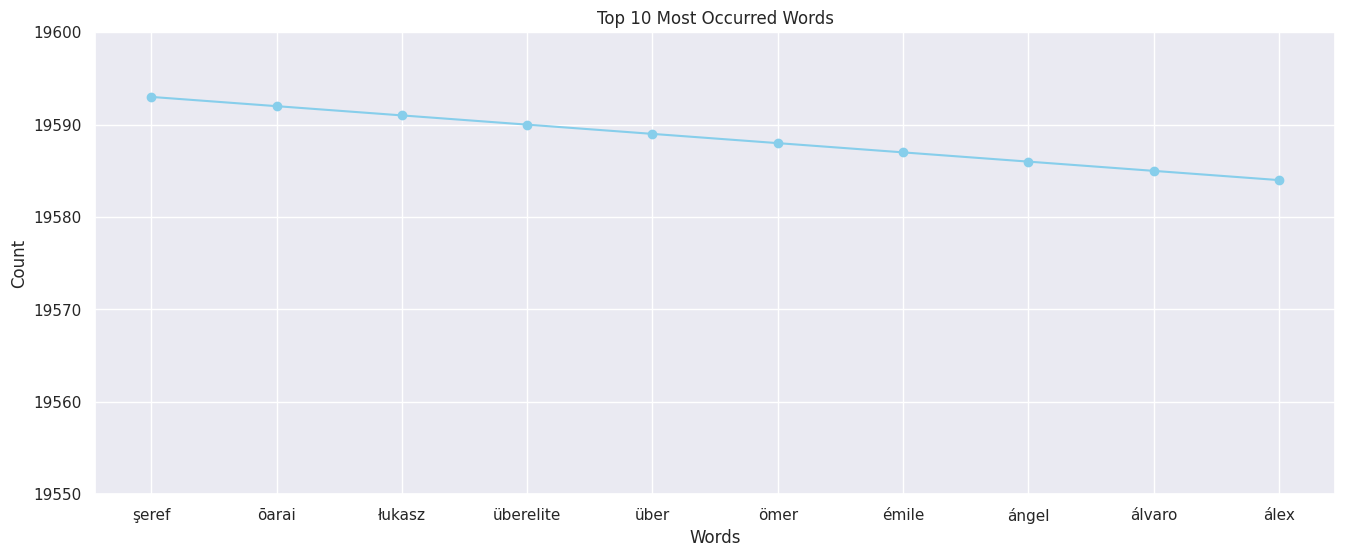

In [106]:
plt.figure(figsize=(16, 6))
plt.plot(top10_most_occurred_words_count, marker='o', linestyle='-', color='skyblue')
plt.xticks(range(len(top10_most_occurred_words)), top10_most_occurred_words)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Most Occurred Words')
plt.ylim(19550, 19600)  # Adjust the xlim to the range of the indices
plt.show()



5.1. SnowballStemmer( 'english' )



In [107]:
#create object of Stemming function
stemmer= SnowballStemmer('english')

In [108]:
def apply_stemming(text):
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [110]:
#stemming for description
data['description'] = data['description'].apply(apply_stemming)
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description  numeric_duration  \
0  futur elit inhabit island paradi far crowd slu...               4.0   
1  devast earthquak hit mexico citi trap survivor...              93.0   
2  armi recruit found dead fellow soldier forc co...              78.0   
3  postapocalypt world ragdol robot hide fear dan...              80.0   
4  brilliant group student becom cardcount expert...             123.0   

   no_of_category date_added_month  
0               3           August  
1               2         December  
2               2         December  
3               3         November  
4               1          January



*  TfidfVectorizer (after stemming)


In [112]:
# create object of tfid Vectorizer
tfidf_vectorizer = TfidfVectorizer()
#Fit the vectorizer using text data
tfidf_vectorizer.fit(data['description'])
#Collect the vocabulary items in the vectorizer
dictionary = tfidf_vectorizer.vocabulary_.items()

In [113]:
dictionary

dict_items([('futur', 5078), ('elit', 4074), ('inhabit', 6433), ('island', 6600), ('paradi', 9286), ('far', 4537), ('crowd', 3116), ('slum', 11596), ('get', 5230), ('one', 9012), ('chanc', 2349), ('join', 6781), ('save', 10954), ('squalor', 11903), ('devast', 3511), ('earthquak', 3965), ('hit', 5984), ('mexico', 8080), ('citi', 2555), ('trap', 12882), ('survivor', 12291), ('walk', 13598), ('life', 7370), ('wait', 13586), ('rescu', 10479), ('tri', 12911), ('desper', 3483), ('stay', 11985), ('aliv', 628), ('armi', 967), ('recruit', 10324), ('found', 4915), ('dead', 3310), ('fellow', 4627), ('soldier', 11694), ('forc', 4868), ('confront', 2839), ('terrifi', 12557), ('secret', 11084), ('that', 12587), ('haunt', 5760), ('jungl', 6852), ('train', 12863), ('camp', 2124), ('postapocalypt', 9760), ('world', 13917), ('ragdol', 10146), ('robot', 10667), ('hide', 5903), ('fear', 4596), ('danger', 3257), ('machin', 7645), ('extermin', 4447), ('brave', 1836), ('newcom', 8672), ('group', 5520), ('bri

In [130]:
#New Dataframe voacb_after_stemming_listed_in
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab, "count": count_of_vocab})
#sort by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count", ascending=False)

In [134]:
top_10_most_ocurred_words = vocab_after_stemming_listed_in.head(10)

In [136]:

top10_most_occurred_words = top10_most_ocurred_words.Word.values
top10_most_occurred_words


array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex'], dtype=object)

In [137]:
top10_most_occurred_words_count = top10_most_ocurred_words['count'].values
top10_most_occurred_words_count

array([14159, 14158, 14157, 14156, 14155, 14154, 14153, 14152, 14151,
       14150])

<BarContainer object of 10 artists>

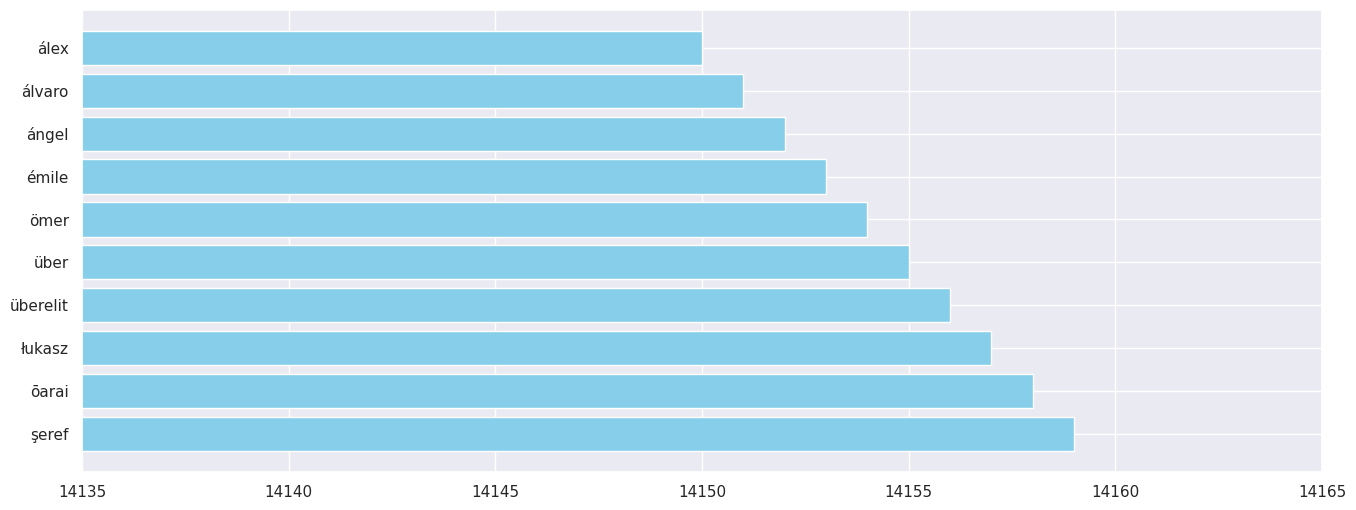

In [140]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14135, 14165)
plt.barh(top10_most_occurred_words, top10_most_occurred_words_count, color='skyblue')


In [141]:
#New Column length that will contain description lenghth
data['Description_length'] = data['description'].apply(len)
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1  TV-MA     93 min                       Dramas, International Movies   
2      R     78 min                Horror Movies, International Movies   
3  PG-13     80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4  PG-13    123 min                                             Dramas   

                                         description  numeric_duration  \
0  futur elit inhabit island paradi far crowd slu...               4.0   
1  devast earthquak hit mexico citi trap survivor...              93.0   
2  armi recruit found dead fellow soldier forc co...              78.0   
3  postapocalypt world ragdol robot hide fear dan...              80.0   
4  brilliant group student becom cardcount expert...             123.0   

   no_of_category date_added_month  Description_length  
0               3           August                  81  
1               2         December                  88  
2               2         December                 102  
3               3         November                  89  
4               1          January                  99

In [142]:
data.description.iloc[0]

'futur elit inhabit island paradi far crowd slum get one chanc join 3 save squalor'

In [143]:
len(data.description.iloc[0])

81

5.2 Removing Punctuation


In [144]:
data['listed_in']= data['listed_in'].apply(remove_punctuation)
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  International TV Shows TV Dramas TV SciFi  Fan...   
1  TV-MA     93 min                        Dramas International Movies   
2      R     78 min                 Horror Movies International Movies   
3  PG-13     80 min  Action  Adventure Independent Movies SciFi  Fa...   
4  PG-13    123 min                                             Dramas   

                                         description  numeric_duration  \
0  futur elit inhabit island paradi far crowd slu...               4.0   
1  devast earthquak hit mexico citi trap survivor...              93.0   
2  armi recruit found dead fellow soldier forc co...              78.0   
3  postapocalypt world ragdol robot hide fear dan...              80.0   
4  brilliant group student becom cardcount expert...             123.0   

   no_of_category date_added_month  Description_length  
0               3           August                  81  
1               2         December                  88  
2               2         December                 102  
3               3         November                  89  
4               1          January                  99

In [145]:
#Removing Stopwords
data['listed_in'] = data['listed_in'].apply(remove_stopwords)
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                          listed_in  \
0  TV-MA  4 Seasons  international tv shows tv dramas tv scifi fantasy   
1  TV-MA     93 min                        dramas international movies   
2      R     78 min                 horror movies international movies   
3  PG-13     80 min  action adventure independent movies scifi fantasy   
4  PG-13    123 min                                             dramas   

                                         description  numeric_duration  \
0  futur elit inhabit island paradi far crowd slu...               4.0   
1  devast earthquak hit mexico citi trap survivor...              93.0   
2  armi recruit found dead fellow soldier forc co...              78.0   
3  postapocalypt world ragdol robot hide fear dan...              80.0   
4  brilliant group student becom cardcount expert...             123.0   

   no_of_category date_added_month  Description_length  
0               3           August                  81  
1               2         December                  88  
2               2         December                 102  
3               3         November                  89  
4               1          January                  99

In [146]:
#Using CountVectorizer() to count vocabulary count
count_vectorizer = CountVectorizer()
count_vectorizer.fit(data['listed_in'])
dictionary= count_vectorizer.vocabulary_.items()
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [147]:
vocab=[]
count_of_vocab=[]
for key, value in dictionary:
  vocab.append(key)
  count_of_vocab.append(value)

In [149]:
listed_in_before_stemming = pd.DataFrame({"Word": vocab, "count": count_of_vocab})
listed_in_before_stemming = listed_in_before_stemming.sort_values("count", ascending=False)
listed_in_before_stemming.head()

Word  count
1          tv     41
12  thrillers     40
40       teen     39
39       talk     38
37    standup     37

In [151]:
#Top 10 most occured word in listed in
top_10_most_ocurred_words = listed_in_before_stemming.head(10)
top_10_most_ocurred_words

Word  count
1                tv     41
12        thrillers     40
40             teen     39
39             talk     38
37          standup     37
16           sports     36
30     spirituality     35
32  spanishlanguage     34
2             shows     33
19           series     32

In [152]:
top_10_most_ocurred_words_listed_in=top_10_most_ocurred_words.Word.values
top_10_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series'], dtype=object)

In [153]:
top_10_most_ocurred_words_count = top_10_most_ocurred_words['count'].values
top_10_most_ocurred_words_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32])

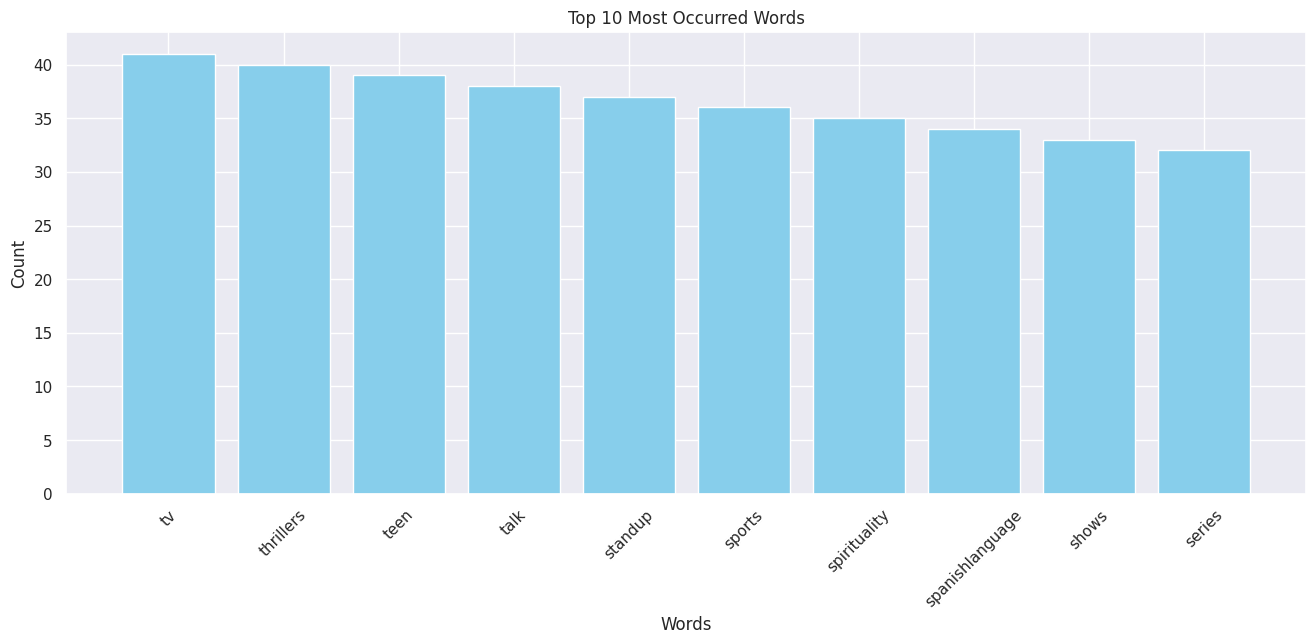

In [157]:
plt.figure(figsize=(16, 6))
plt.bar(top_10_most_ocurred_words_listed_in,top_10_most_ocurred_words_count, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Most Occurred Words')
plt.xticks(rotation=45)
plt.show()

In [158]:
#Use SnowBallStemmer
data['listed_in'] = data['listed_in'].apply(apply_stemming)
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                    listed_in  \
0  TV-MA  4 Seasons     intern tv show tv drama tv scifi fantasi   
1  TV-MA     93 min                            drama intern movi   
2      R     78 min                      horror movi intern movi   
3  PG-13     80 min  action adventur independ movi scifi fantasi   
4  PG-13    123 min                                        drama   

                                         description  numeric_duration  \
0  futur elit inhabit island paradi far crowd slu...               4.0   
1  devast earthquak hit mexico citi trap survivor...              93.0   
2  armi recruit found dead fellow soldier forc co...              78.0   
3  postapocalypt world ragdol robot hide fear dan...              80.0   
4  brilliant group student becom cardcount expert...             123.0   

   no_of_category date_added_month  Description_length  
0               3           August                  81  
1               2         December                  88  
2               2         December                 102  
3               3         November                  89  
4               1          January                  99

In [159]:
#Now using TfidVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data['listed_in'])
dictionary = tfidf_vectorizer.vocabulary_.items()
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [160]:
#List to store vocab and count
vocab=[]
count_of_vocab=[]
for key, value in dictionary:
  vocab.append(key)
  count_of_vocab.append(value)



*   New Dataframe vocab_after_stemming_listed_in




In [161]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab, "count": count_of_vocab})
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count", ascending=False)

In [167]:
top10_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(10)

In [168]:
top10_most_ocurred_vocab_lised_in_after_stem_word = top10_most_ocurred_vocab_lised_in_after_stem.Word.values
top10_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri'], dtype=object)

In [169]:

top10_most_occurred_words_listed_in_count = top10_most_ocurred_vocab_lised_in_after_stem['count'].values
top10_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30])

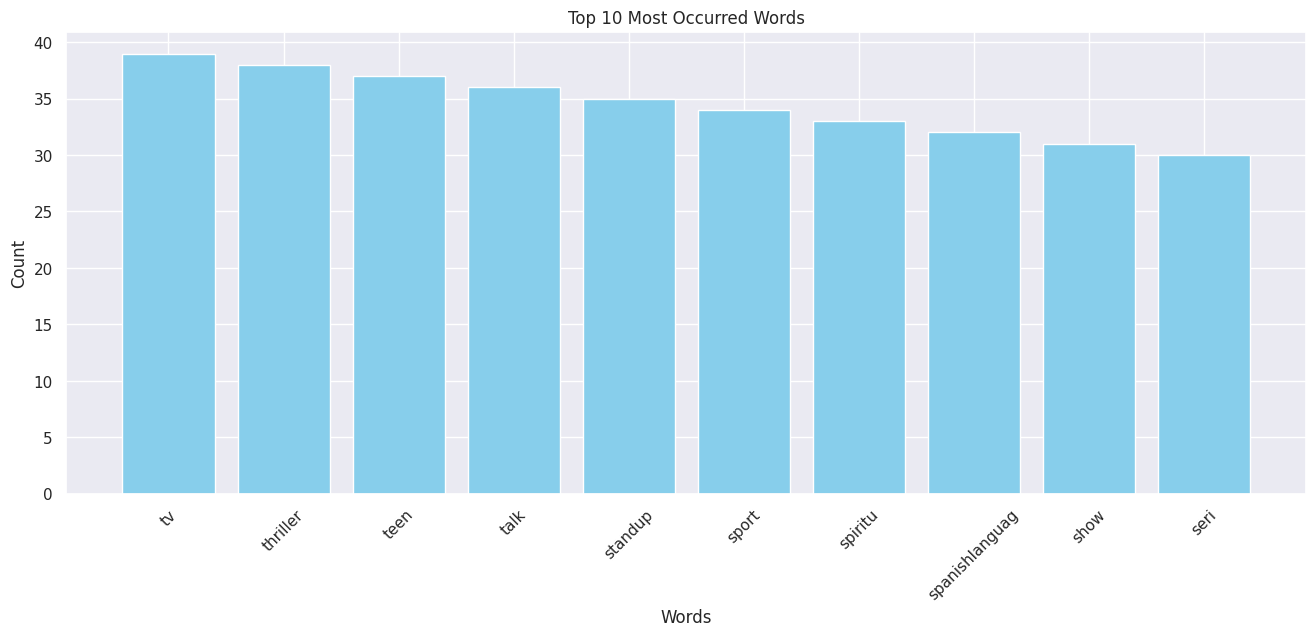

In [170]:
plt.figure(figsize=(16, 6))
plt.bar(top10_most_ocurred_vocab_lised_in_after_stem_word, top10_most_occurred_words_listed_in_count, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Most Occurred Words')
plt.xticks(rotation=45)
plt.show()

In [171]:
#adding  a new column that will store length of listed in
data['listed_in_length'] = data['listed_in'].apply(len)
data.head()

show_id     type  title        country         date_added  release_year  \
0      s1  TV Show     3%         Brazil    August 14, 2020   2020.000000   
1      s2    Movie   7:19         Mexico  December 23, 2016   2016.000000   
2      s3    Movie  23:59      Singapore  December 20, 2018   2011.000000   
3      s4    Movie      9  United States  November 16, 2017   2009.000000   
4      s5    Movie     21  United States    January 1, 2020   2013.935965   

  rating   duration                                    listed_in  \
0  TV-MA  4 Seasons     intern tv show tv drama tv scifi fantasi   
1  TV-MA     93 min                            drama intern movi   
2      R     78 min                      horror movi intern movi   
3  PG-13     80 min  action adventur independ movi scifi fantasi   
4  PG-13    123 min                                        drama   

                                         description  numeric_duration  \
0  futur elit inhabit island paradi far crowd slu...               4.0   
1  devast earthquak hit mexico citi trap survivor...              93.0   
2  armi recruit found dead fellow soldier forc co...              78.0   
3  postapocalypt world ragdol robot hide fear dan...              80.0   
4  brilliant group student becom cardcount expert...             123.0   

   no_of_category date_added_month  Description_length  listed_in_length  
0               3           August                  81                40  
1               2         December                  88                17  
2               2         December                 102                23  
3               3         November                  89                43  
4               1          January                  99                 5

In [172]:
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'numeric_duration',
       'no_of_category', 'date_added_month', 'Description_length',
       'listed_in_length'],
      dtype='object')

#Clustering


Clustering in unsupervised learning is a technique used to group a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups (clusters). This method does not require labeled data and is often used to find natural groupings in data.

1.  Silhouette score

In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df' and contains the relevant columns
X_features_rec = data[['no_of_category', 'Description_length', 'listed_in_length']]

# Standardize the numerical features
scaler = StandardScaler()
X_rescale = scaler.fit_transform(X_features_rec)
X = X_rescale  # Features to be used for clustering

# List to store silhouette scores
silhouette_scores = []

# Range of clusters to try
range_n_clusters = range(2, 16)

# Iterate over number of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)

    # Compute the Silhouette score
    score = silhouette_score(X, preds)
    silhouette_scores.append([n_clusters, round(score, 3)])

    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.4228398018691494
For n_clusters = 3, silhouette score is 0.3840942339452511
For n_clusters = 4, silhouette score is 0.3721990218487696
For n_clusters = 5, silhouette score is 0.370576732786003
For n_clusters = 6, silhouette score is 0.36773629239225747
For n_clusters = 7, silhouette score is 0.374433684259442
For n_clusters = 8, silhouette score is 0.3698259949757615
For n_clusters = 9, silhouette score is 0.37460603990373975
For n_clusters = 10, silhouette score is 0.3622616462983569
For n_clusters = 11, silhouette score is 0.35631434748522073
For n_clusters = 12, silhouette score is 0.3515762802374154
For n_clusters = 13, silhouette score is 0.34532941313501037
For n_clusters = 14, silhouette score is 0.34927539316490896
For n_clusters = 15, silhouette score is 0.34440783835442323


In [185]:
results_df = pd.DataFrame(silhouette_scores, columns=['n_clusters', 'silhouette_score'])
results_df= results_df.sort_values('silhouette_score', ascending=False)
results_df

n_clusters  silhouette_score
0            2             0.423
1            3             0.384
7            9             0.375
5            7             0.374
2            4             0.372
3            5             0.371
6            8             0.370
4            6             0.368
8           10             0.362
9           11             0.356
10          12             0.352
12          14             0.349
11          13             0.345
13          15             0.344

The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters

For n_clusters = 2 The average silhouette_score is : 0.4228398018691494


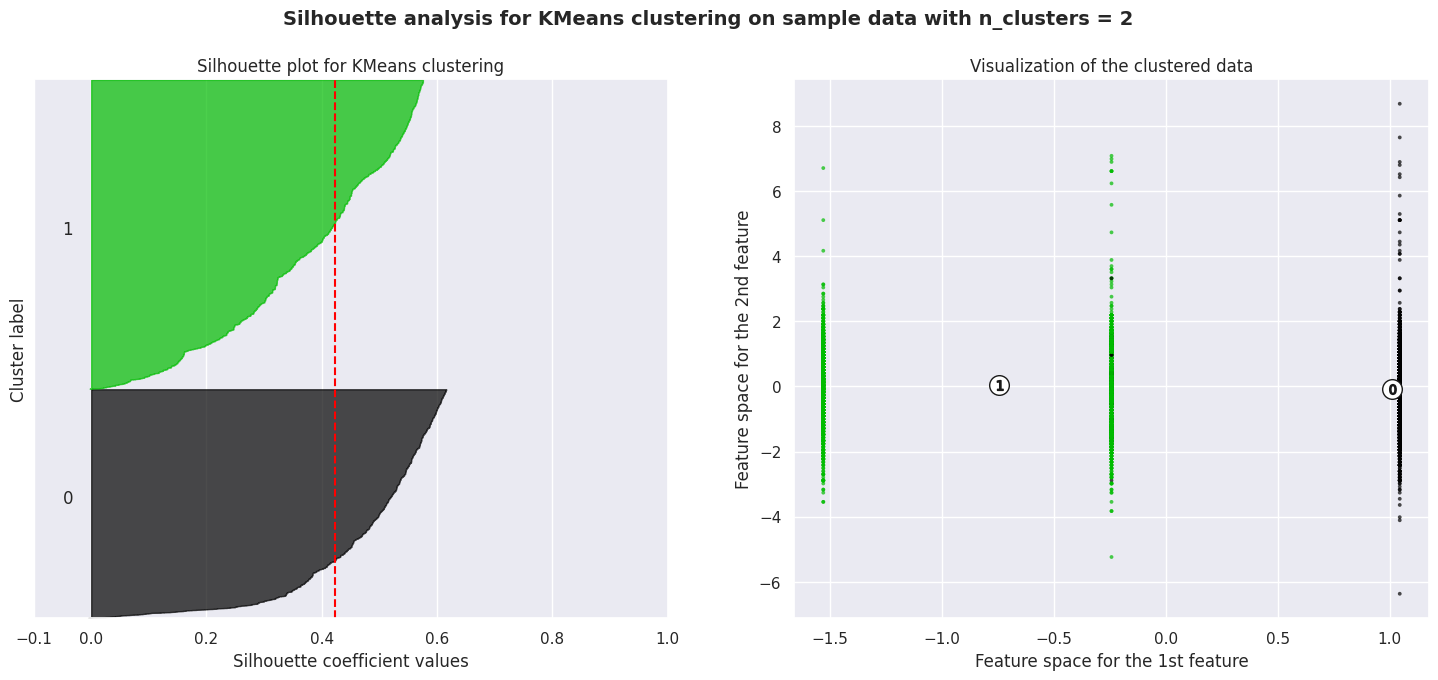

For n_clusters = 3 The average silhouette_score is : 0.3840942339452511


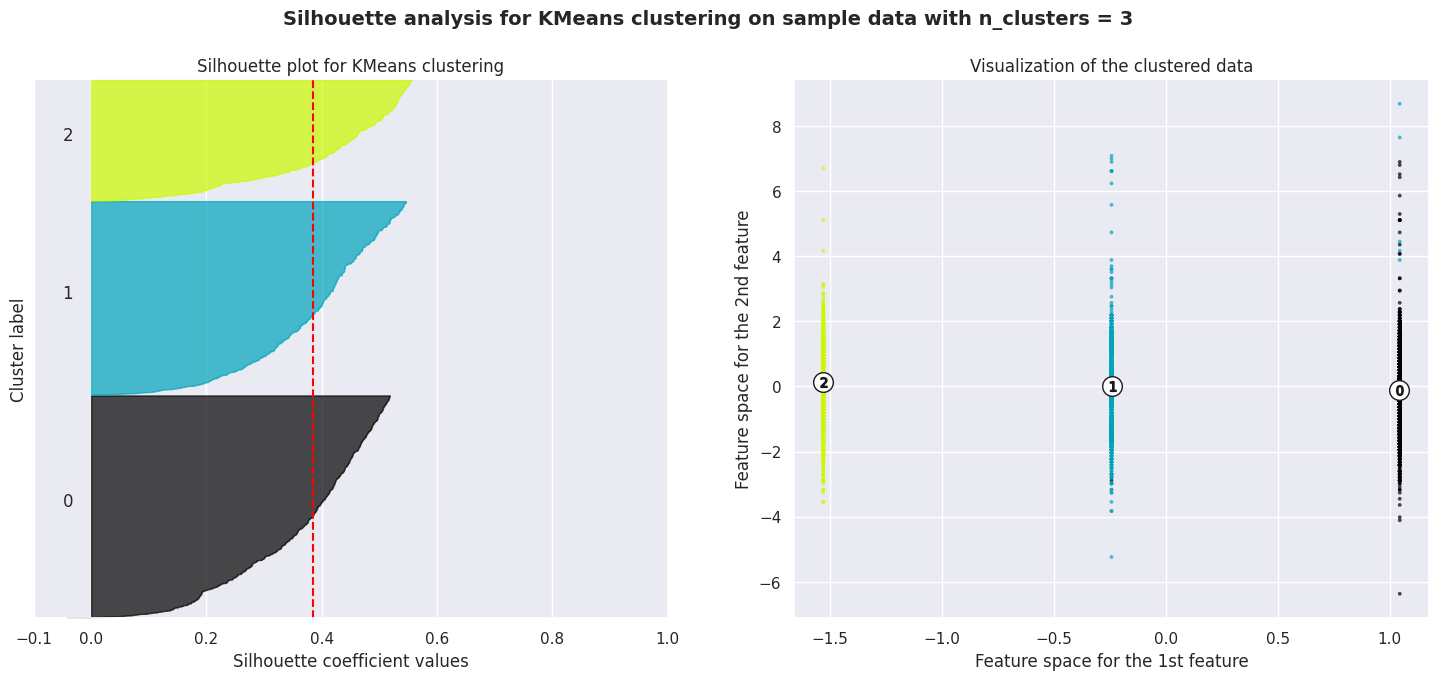

For n_clusters = 9 The average silhouette_score is : 0.37508114732527237


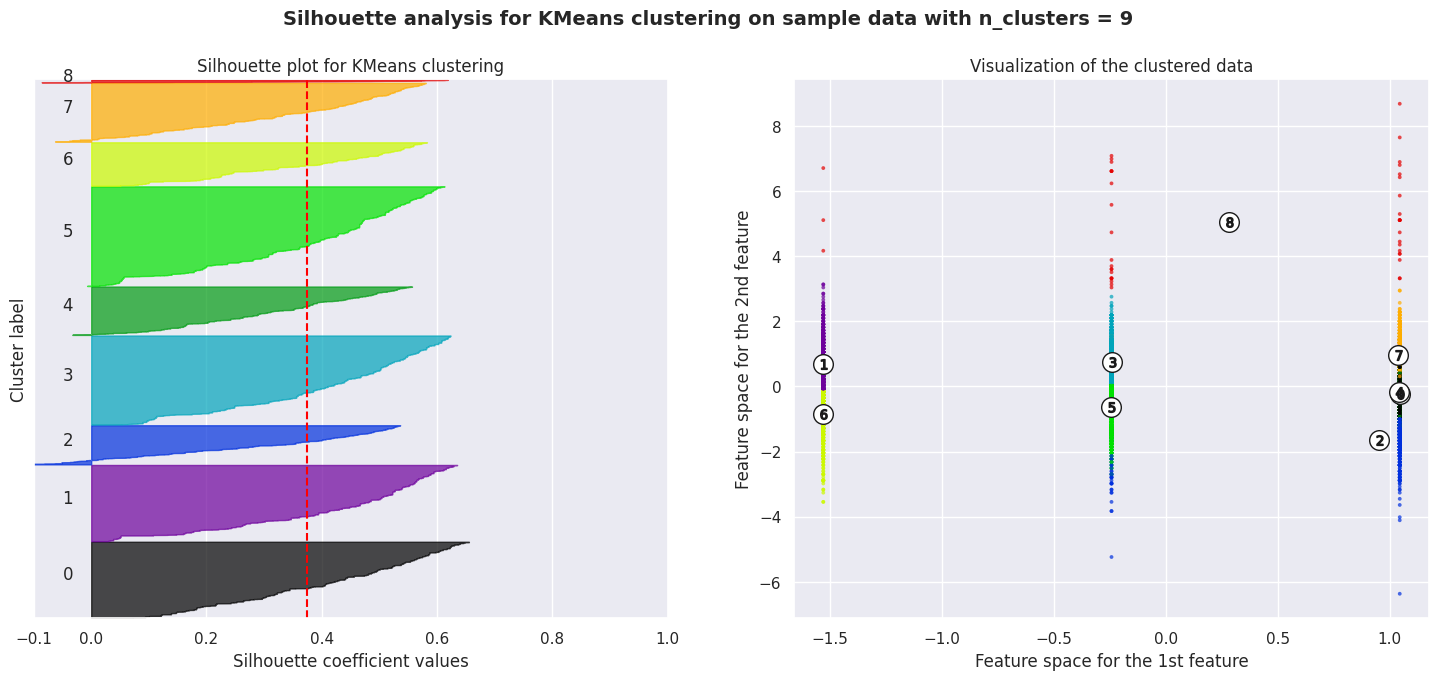

For n_clusters = 7 The average silhouette_score is : 0.37605301042634764


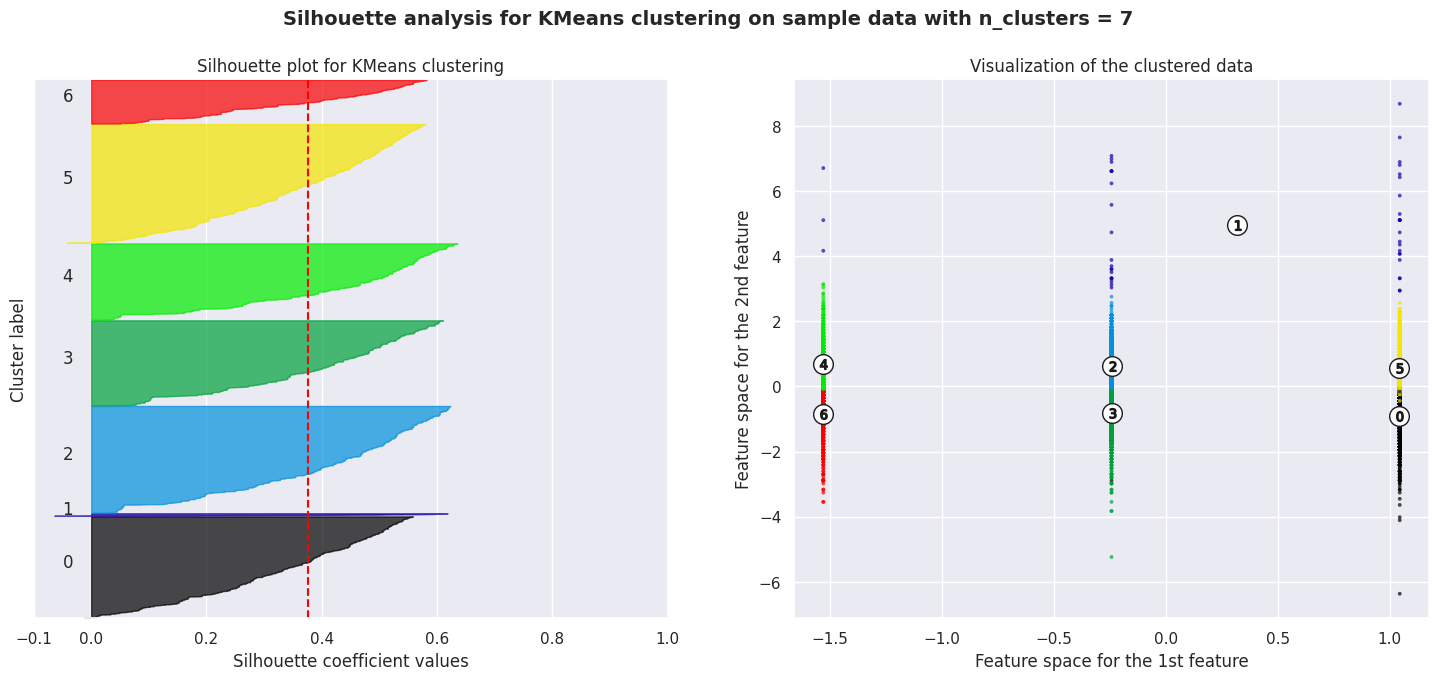

For n_clusters = 4 The average silhouette_score is : 0.3719304364396228


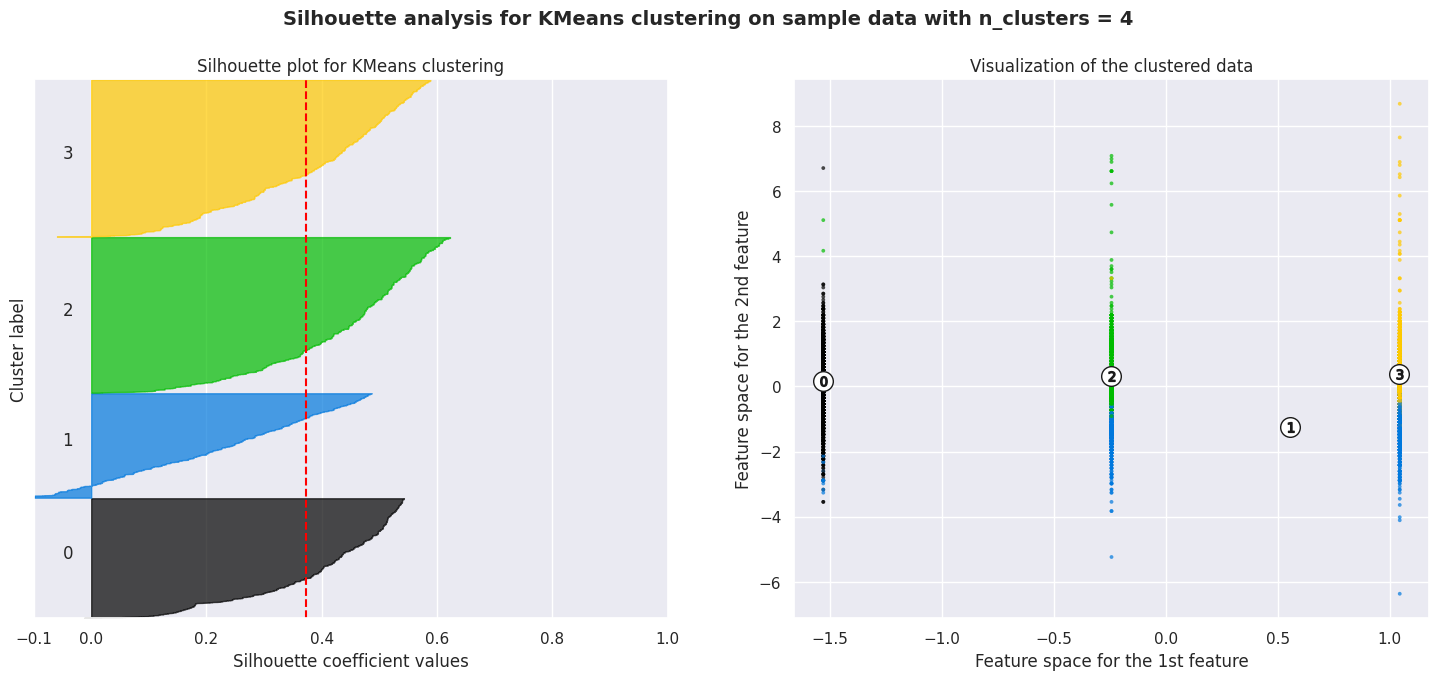

For n_clusters = 5 The average silhouette_score is : 0.37058390827648413


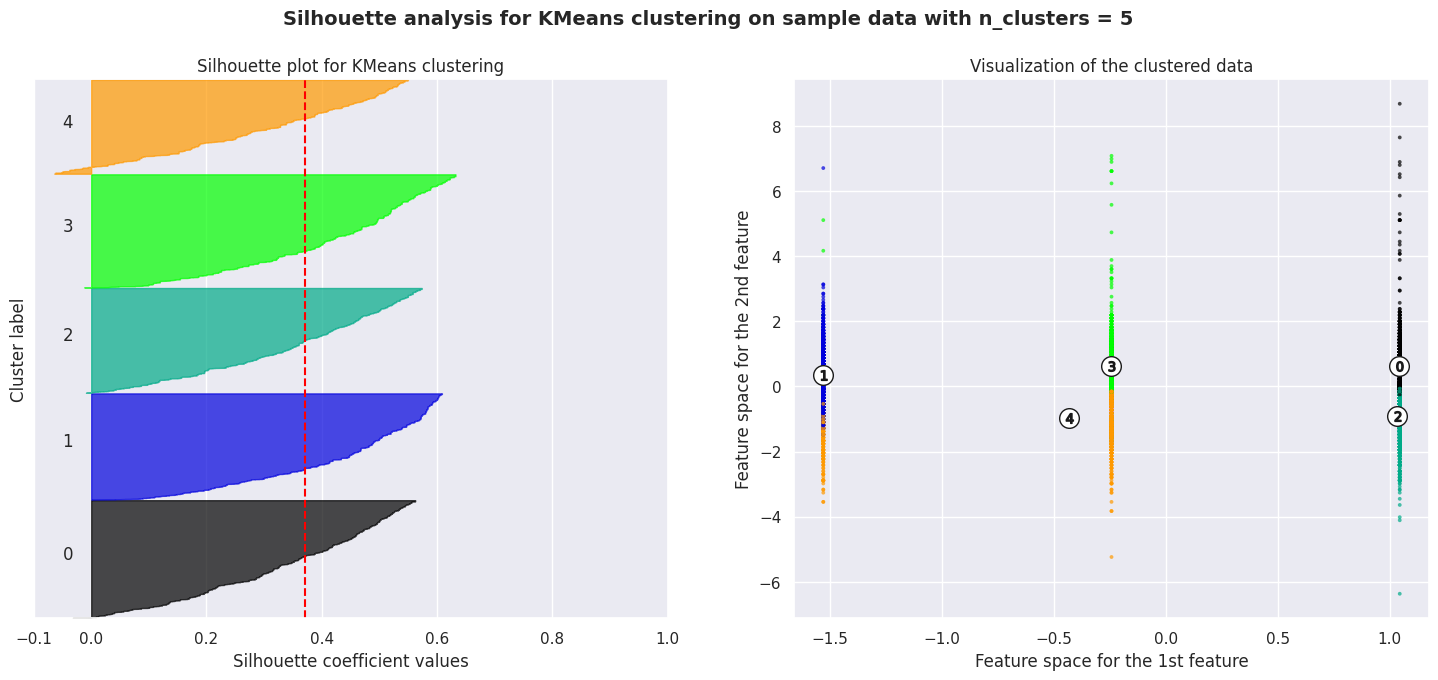

For n_clusters = 8 The average silhouette_score is : 0.3690046041347228


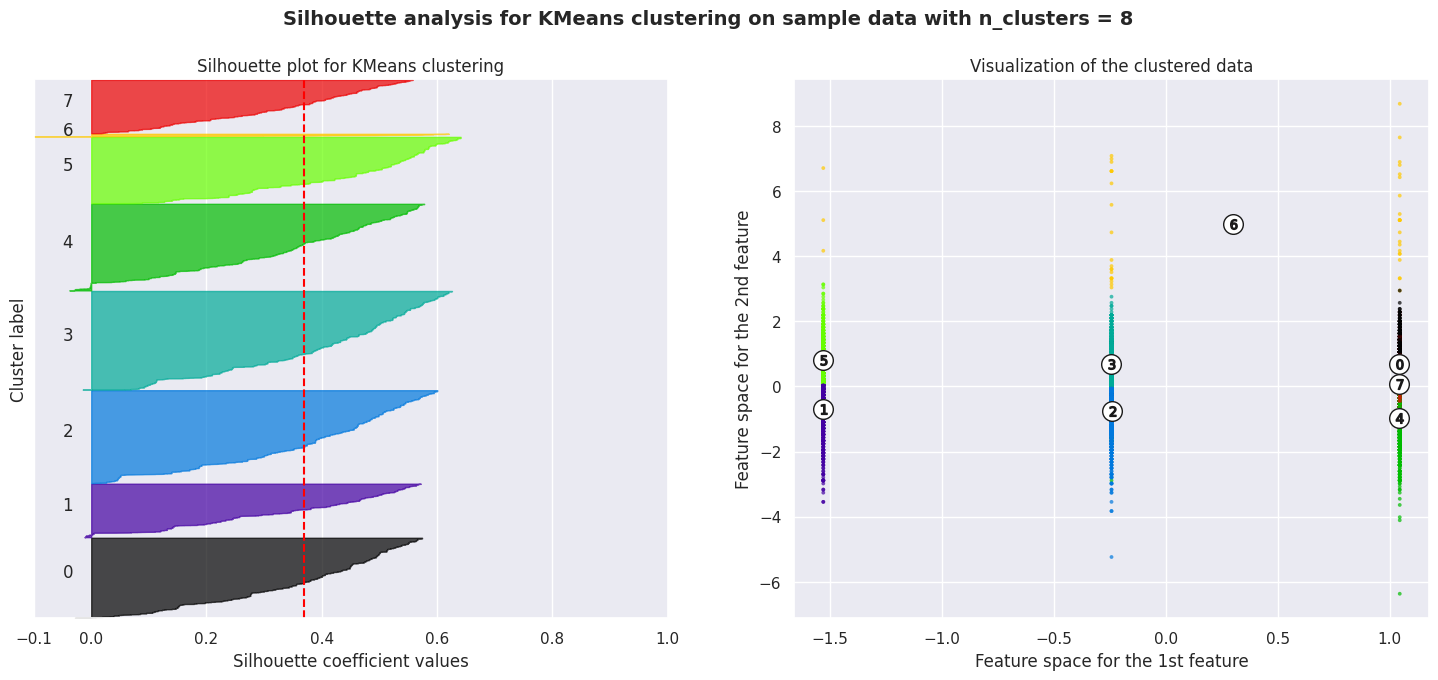

For n_clusters = 6 The average silhouette_score is : 0.3697873503304324


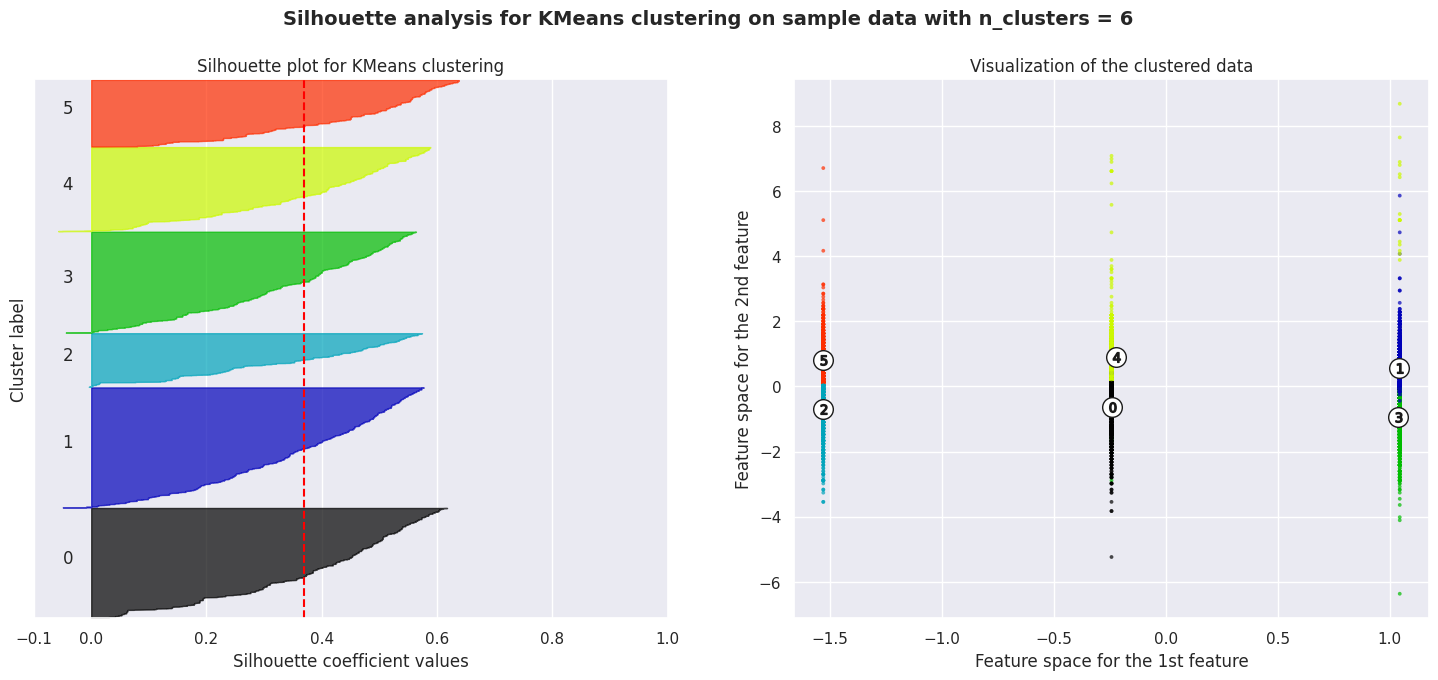

For n_clusters = 10 The average silhouette_score is : 0.36290146254445527


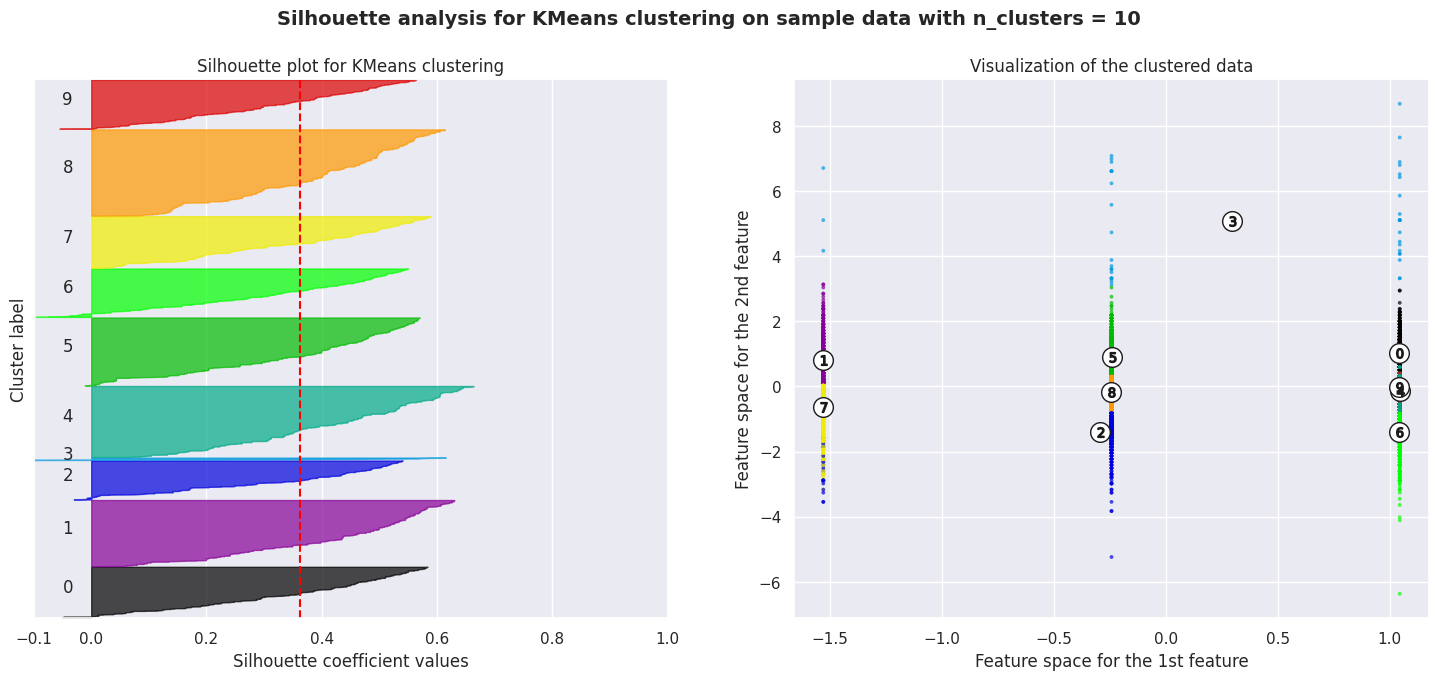

For n_clusters = 11 The average silhouette_score is : 0.358075594310645


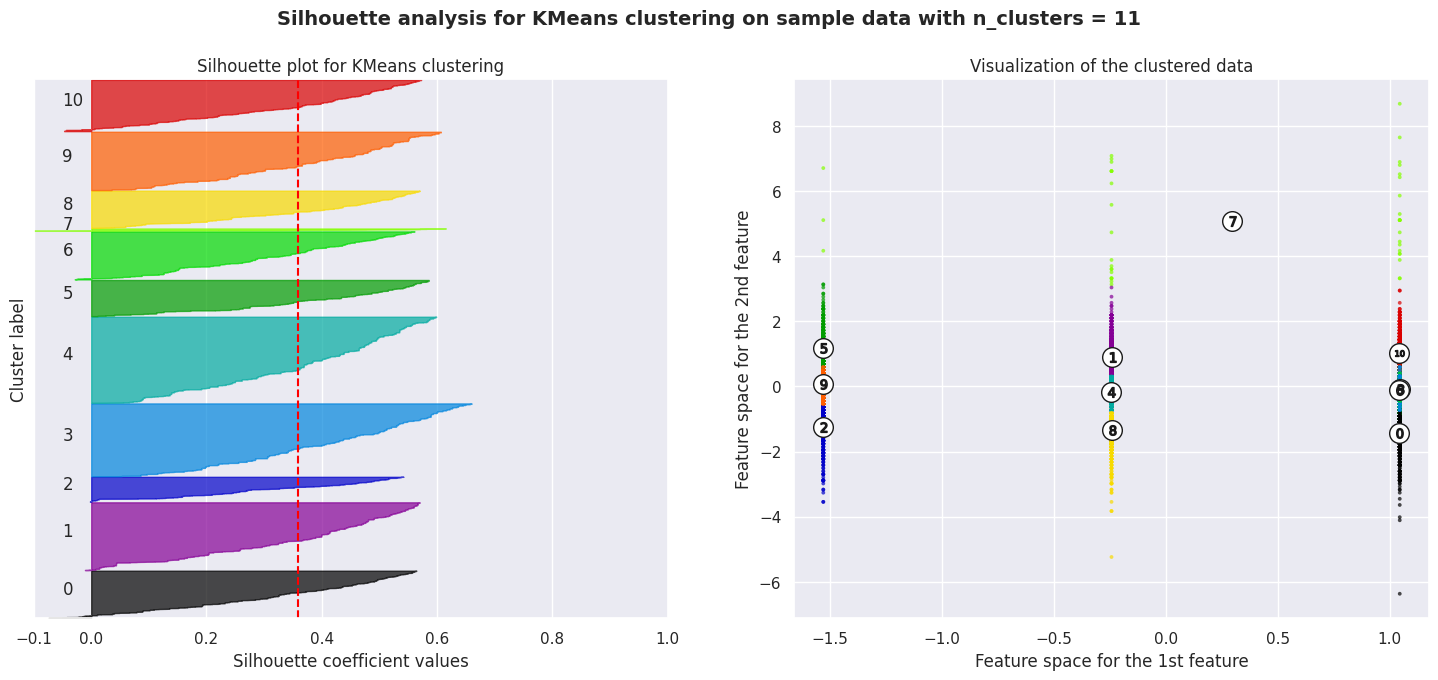

For n_clusters = 12 The average silhouette_score is : 0.3556648231741792


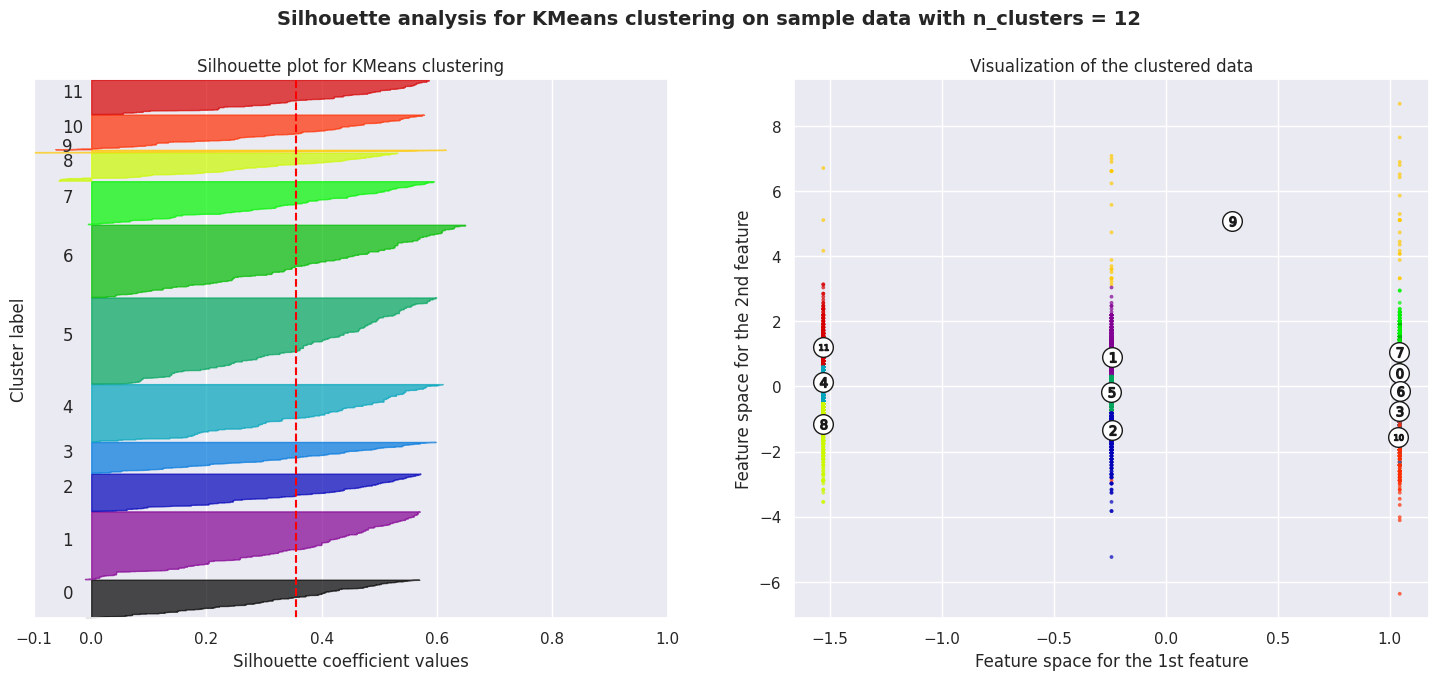

For n_clusters = 14 The average silhouette_score is : 0.32962334916040514


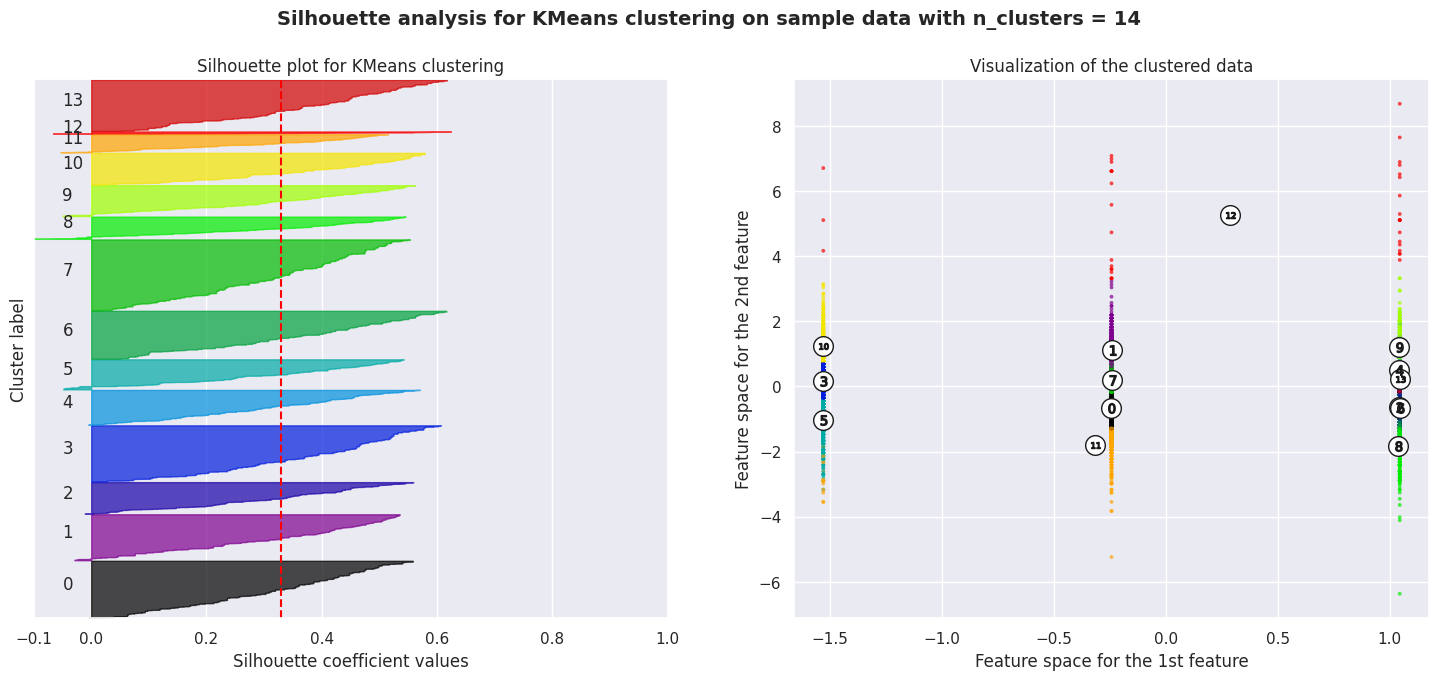

For n_clusters = 13 The average silhouette_score is : 0.34924099803009695


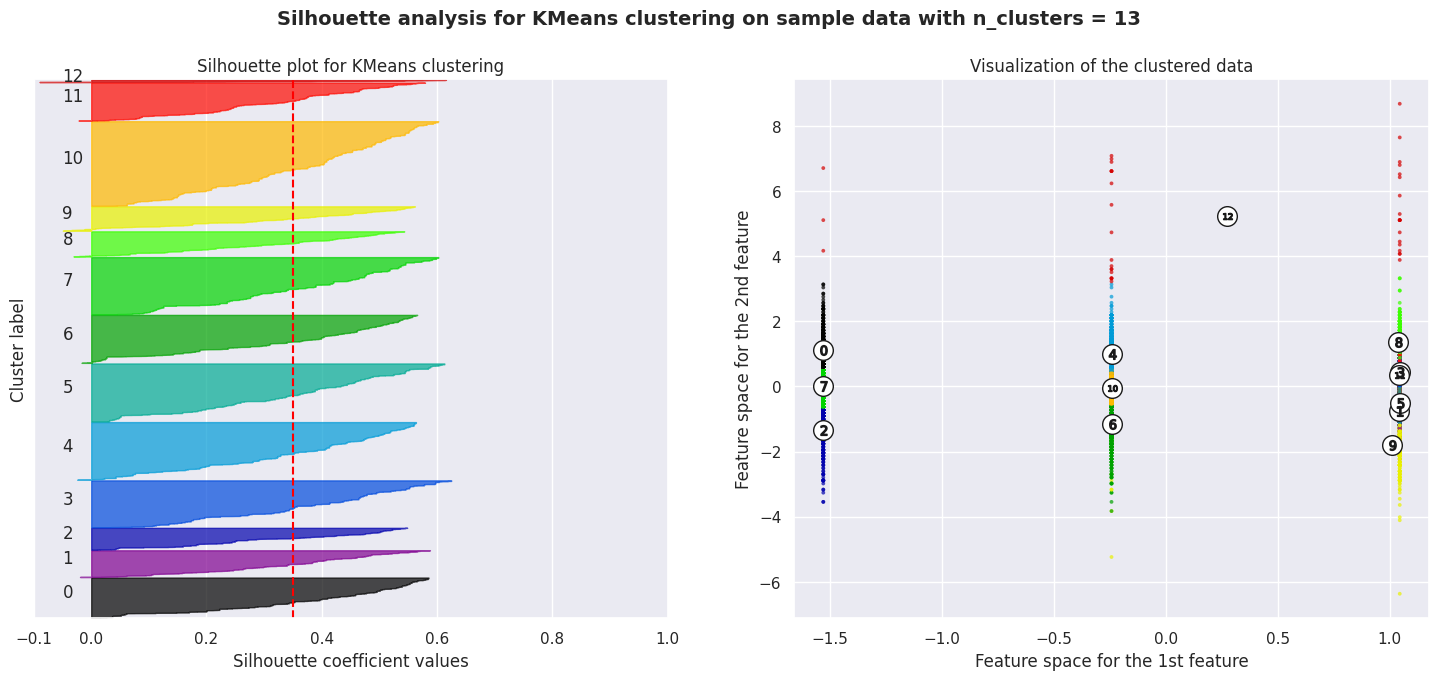

For n_clusters = 15 The average silhouette_score is : 0.3441623510350133


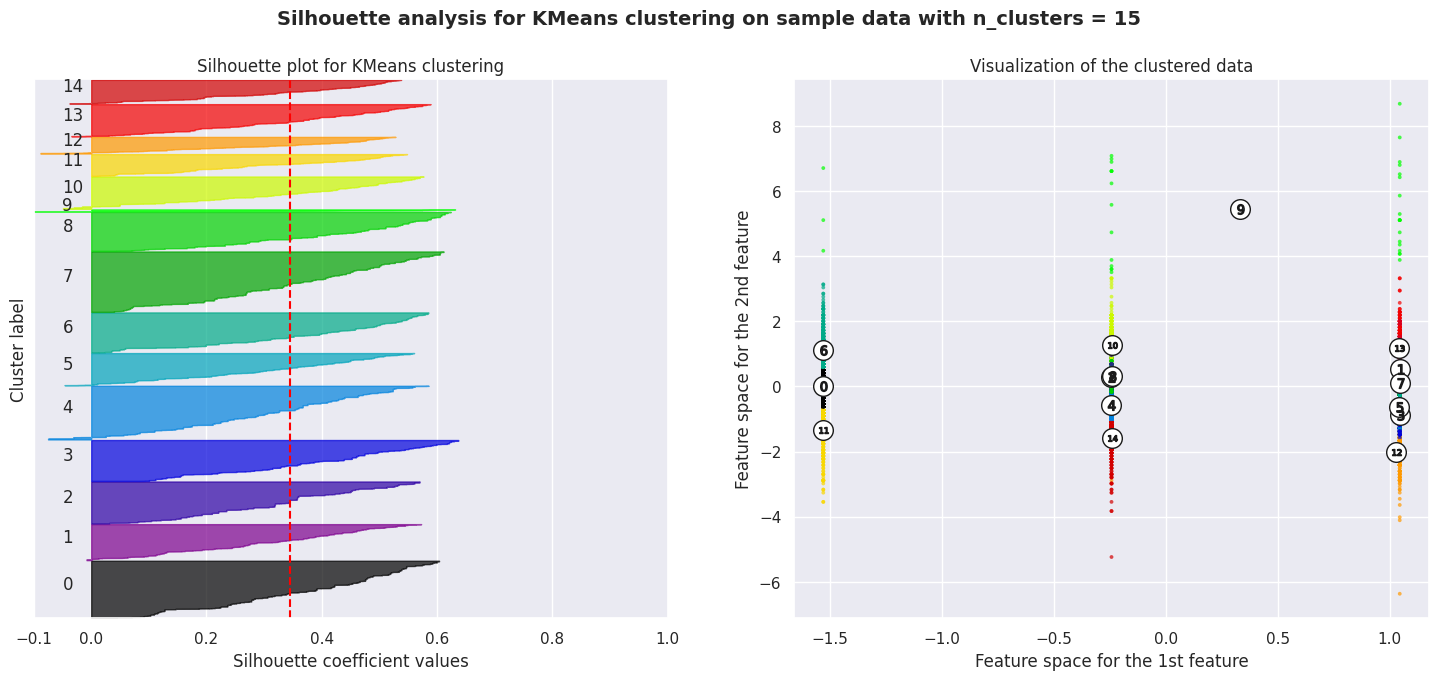

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already created the results_df DataFrame
# results_df should have columns 'n_clusters' and 'silhouette_score'

# Selecting the range of clusters to plot in ascending order
range_n_clusters = results_df['n_clusters'].values


X_features_rec = data[['no_of_category', 'Description_length', 'listed_in_length']]

# Standardize the numerical features
scaler = StandardScaler()
X_rescale = scaler.fit_transform(X_features_rec)
X = X_rescale  # Features to be used for clustering

# Iterate over each cluster size in ascending order
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for KMeans clustering")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()



The Silhouette Score is a metric used to evaluate the quality of clusters in unsupervised learning, such as clustering algorithms like K-means. It provides a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Higher values (closer to +1) indicate that clusters are well-separated and samples are appropriately clustered.

Lower values (close to 0 or negative) suggest that clusters may be overlapping or poorly defined.


# Elbow Method

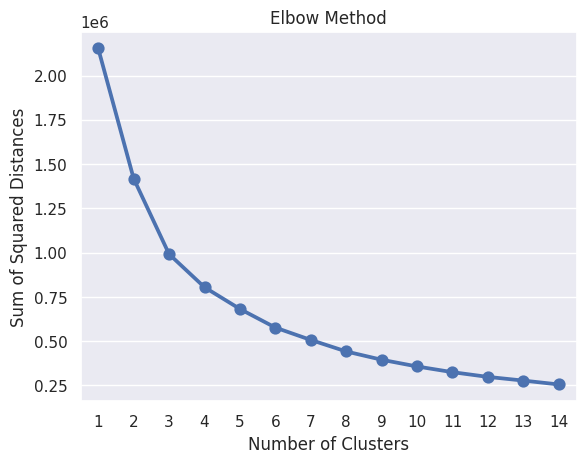

In [189]:
#Elbow Method
sum_of_sq_dist={}
for k in range(1,15):
  kmeans=KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X_features_rec)
  sum_of_sq_dist[k]=kmeans.inertia_

sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


 Use K =3 since drop is sudden at point 3

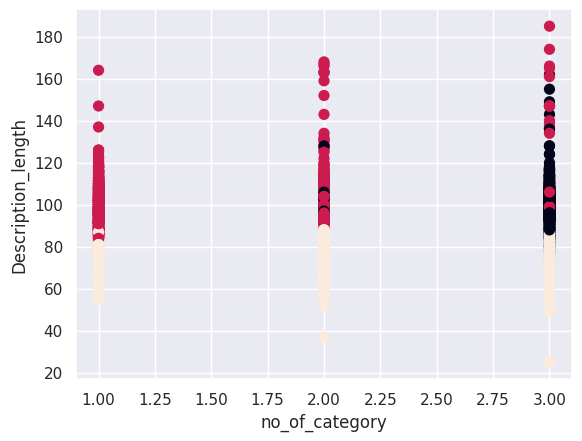

In [197]:
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_features_rec)
y_means=kmeans.predict(X_features_rec)
plt.scatter(X_features_rec['no_of_category'],X_features_rec['Description_length'],c=y_means,s=50)
plt.xlabel('no_of_category')
plt.ylabel('Description_length')
plt.show()

DBSCAN

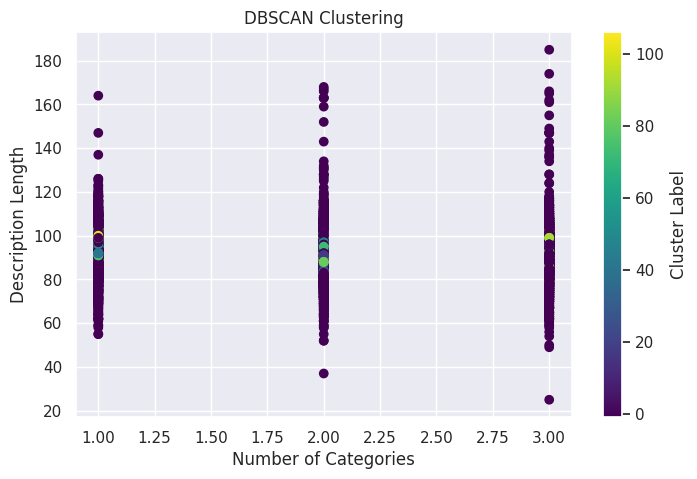

In [196]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming X_features_rec represents your selected features
X = X_features_rec.values

# Apply DBSCAN clustering with specified parameters
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')  # Adjust cmap as needed
plt.title('DBSCAN Clustering')
plt.xlabel('Number of Categories')
plt.ylabel('Description Length')
plt.colorbar(label='Cluster Label')
plt.show()



Dendogram

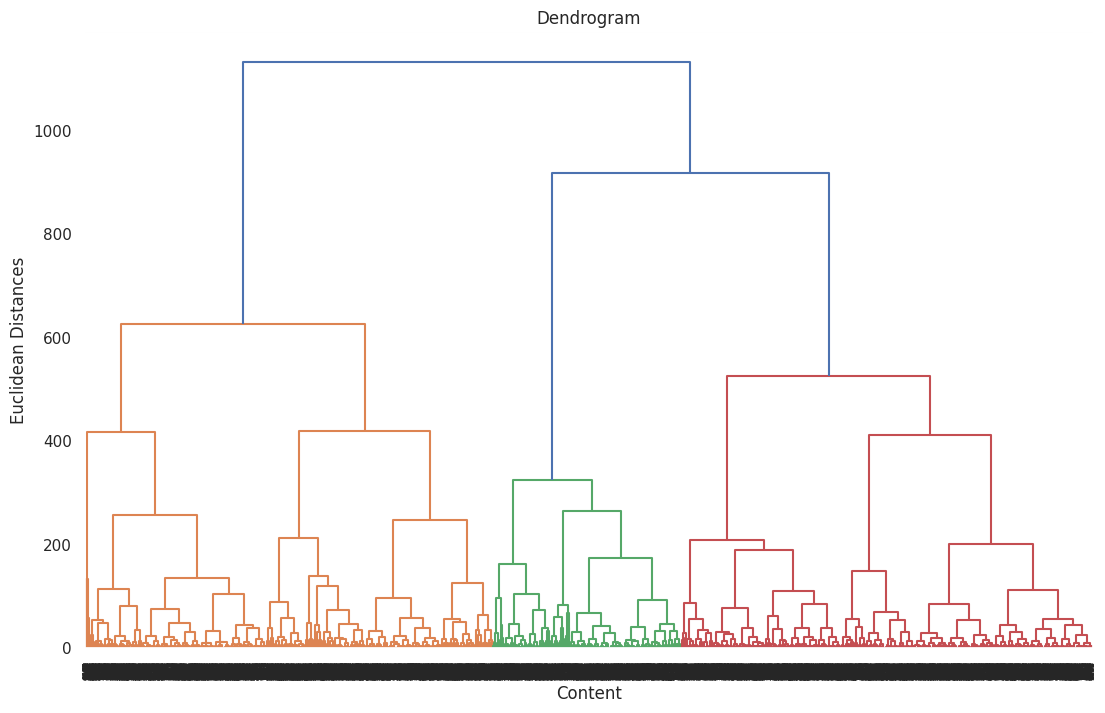

In [202]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X_features_rec, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

KMean Clustering

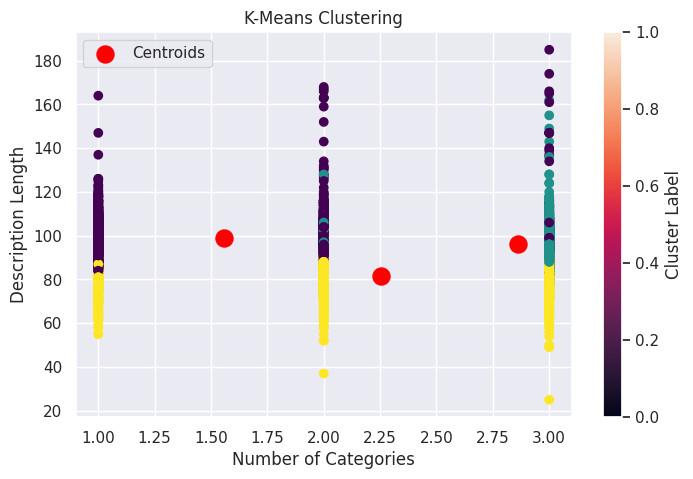

In [204]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example with 3 clusters (determined using Elbow Method)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_features_rec)

# Plotting the clusters (example with the first two features)
plt.figure(figsize=(8, 5))
plt.scatter(X_features_rec['no_of_category'], X_features_rec['Description_length'], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=150, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Number of Categories')
plt.ylabel('Description Length')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()



K-Means is a popular centroid-based clustering algorithm that partitions data into K clusters. It minimizes the sum of squared distances between data points and their respective cluster centroids. You can use the Elbow Method or Silhouette Score to determine the optimal number of clusters.

Spectral Clustering

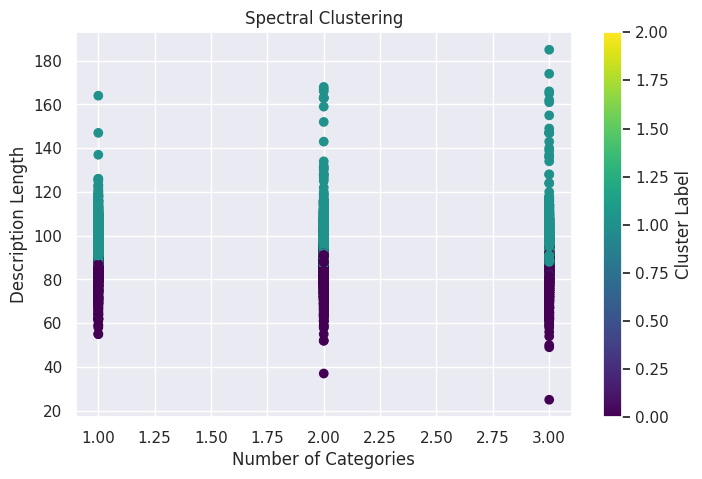

In [206]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

n_clusters = 3
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral_clustering.fit_predict(X_features_rec)

# Plotting the clusters (example with the first two features)
plt.figure(figsize=(8, 5))
plt.scatter(X_features_rec['no_of_category'], X_features_rec['Description_length'], c=cluster_labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('Number of Categories')
plt.ylabel('Description Length')
plt.colorbar(label='Cluster Label')
plt.show()


Spectral Clustering uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in fewer dimensions. It can capture complex cluster structures and is particularly effective for graph-based data.


Gaussian Mixture

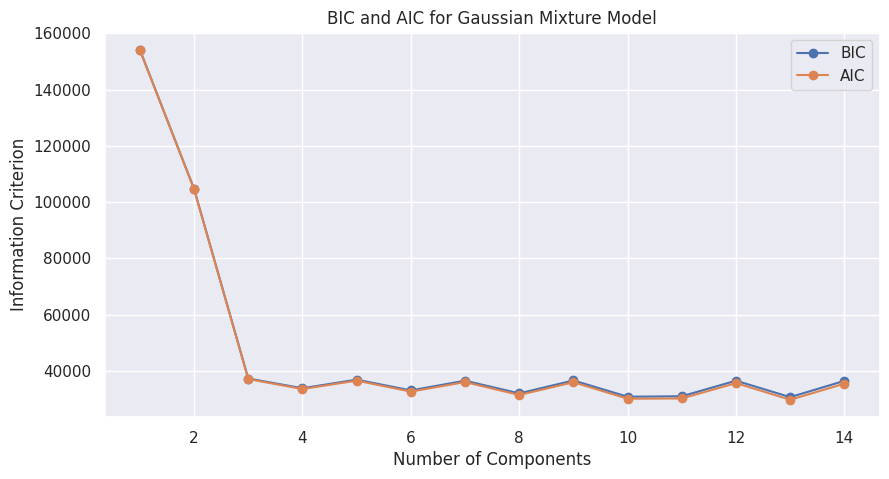

In [212]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_components_range = range(1, 15)  # Range of number of components to try
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_features_rec)
    bics.append(gmm.bic(X_features_rec))
    aics.append(gmm.aic(X_features_rec))

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('BIC and AIC for Gaussian Mixture Model')
plt.legend()
plt.show()


The **Akaike Information Criterion** (AIC) and the **Bayesian Information Criterion** (BIC) are metrics used to evaluate statistical models, balancing model fit and complexity. The AIC measures model quality by considering both goodness of fit and the number of parameters, penalizing more complex models to avoid overfitting. Similarly, the BIC evaluates model quality but imposes a stronger penalty for complexity, favoring simpler models more than the AIC. Both criteria are used for model selection, with the model having the lowest AIC or BIC value generally preferred. These tools help achieve a balance between accurately fitting the data and maintaining model simplicity.

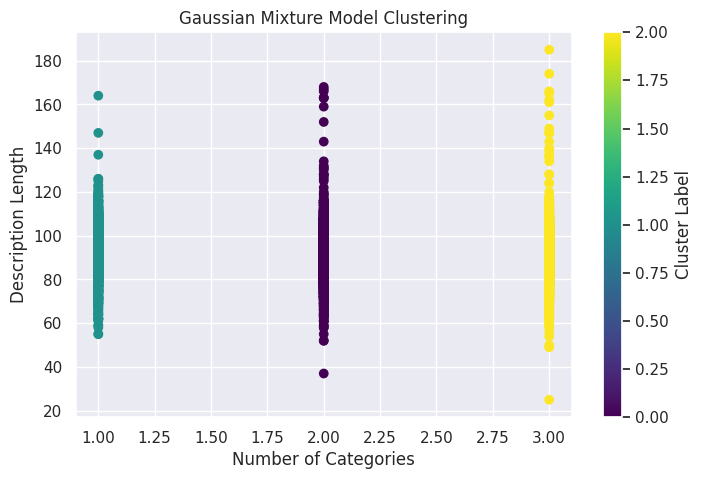

In [210]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
cluster_labels = gmm.fit_predict(X_features_rec)

# Plotting the clusters (example with the first two features)
plt.figure(figsize=(8, 5))
plt.scatter(X_features_rec['no_of_category'], X_features_rec['Description_length'], c=cluster_labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Number of Categories')
plt.ylabel('Description Length')
plt.colorbar(label='Cluster Label')
plt.show()

#**Conclusion**

### Conclusion

- **Data Cleaning**: Director and cast contain a large number of null values, so we will drop these two columns.
- **Content Types**: In this dataset, 30.86% are TV shows, and 69.14% are movies.
- **Trend Analysis**:
  - Netflix is increasingly focusing on both movies and TV shows, with an 80% increase in movies and a 73% increase in TV shows since 2016.
  - The most number of TV shows were released in 2017, and for movies, it was 2020.
- **Geographical Insights**:
  - Netflix USA has the largest number of contents.
  - Most countries prefer to produce movies more than TV shows.
- **Content Categories**:
  - Most movies belong to three categories.
  - The top three content categories are international movies, dramas, and comedies.
- **Text Analysis (NLP)**:
  - Used stop words removal, punctuation removal, stemming, and the TF-IDF vectorizer.
- **Clustering Models**:
  - Applied different clustering models like K-Means, hierarchical clustering, and DBSCAN.
  - Determined that the optimal number of clusters is three.
- **Additional Clustering Techniques**:
  - Applied Gaussian Mixture Models (GMM), which indicated three optimal clusters, allowing clusters to have different shapes and sizes.
  - Applied Spectral Clustering, which uses graph-based methods to handle complex cluster structures, confirming the same cluster arrangement, thus providing robust clustering results across different techniques.
